In [3]:
install.packages('matlib')
install.packages('rsample')
install.packages("corrplot")
install.packages("tidyr")
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘cowplot’, ‘Deriv’, ‘forecast’, ‘microbenchmark’, ‘rbibutils’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘rgl’, ‘car’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘warp’, ‘furrr’, ‘slider’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [4]:
#importing needed library

library(matlib)
library(ggplot2)
library(rsample)
library(corrplot)
library(tidyr)
library(reshape2)

corrplot 0.95 loaded


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [5]:
#importing csv file
X = as.data.frame(read.csv('/content/demo_x.csv'))


In [6]:
# showing first 6 rows of dependent variable
head(X)

,bg_mean,insulin_sum,carbs_sum,hr_mean,steps_sum,cals_sum
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,13.34167,1.8644,0,NA,0,0
2,13.54167,1.9646,0,NA,0,0
3,13.71667,2.0648,0,NA,0,0
4,13.90833,2.1650,0,NA,0,0
5,14.10417,2.2652,0,NA,0,0
6,14.28750,2.3654,0,NA,0,0


In [7]:
#Changing columns names of independent variables
colnames(X) <- c("X1","X2","X3","X4","X5","X6")
head(X)

,X1,X2,X3,X4,X5,X6
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,13.34167,1.8644,0,NA,0,0
2,13.54167,1.9646,0,NA,0,0
3,13.71667,2.0648,0,NA,0,0
4,13.90833,2.1650,0,NA,0,0
5,14.10417,2.2652,0,NA,0,0
6,14.28750,2.3654,0,NA,0,0


In [8]:
Y = as.data.frame(read.csv('/content/demo_y.csv'))

In [9]:
#Showing first 6 rows of targeted variable
head(Y)

,bg.1.00
,<dbl>
1,13.4
2,12.8
3,15.5
4,14.8
5,12.7
6,11.4


In [10]:
#Changing column name of targeted variable
colnames(Y) <- c('y')
head(Y)

,y
,<dbl>
1,13.4
2,12.8
3,15.5
4,14.8
5,12.7
6,11.4


In [11]:
#Checking dimensions of X
dim(X)

[1] 21919     6

In [12]:
#Find the statistical summary of independent variables
summary(X)

       X1               X2                X3               X4        
 Min.   : 2.804   Min.   : 0.6819   Min.   :  0.00   Min.   : 52.00  
 1st Qu.: 7.506   1st Qu.: 6.1425   1st Qu.:  0.00   1st Qu.: 72.44  
 Median : 8.836   Median :10.9345   Median : 30.00   Median : 81.84  
 Mean   : 9.096   Mean   :11.3989   Mean   : 36.04   Mean   : 81.17  
 3rd Qu.:10.281   3rd Qu.:15.3329   3rd Qu.: 60.00   3rd Qu.: 88.65  
 Max.   :20.338   Max.   :51.7439   Max.   :750.00   Max.   :143.00  
                                                     NA's   :7872    
       X5              X6        
 Min.   :    0   Min.   :   0.0  
 1st Qu.:    0   1st Qu.:   0.0  
 Median :  600   Median : 167.3  
 Mean   : 2230   Mean   : 295.9  
 3rd Qu.: 3892   3rd Qu.: 524.6  
 Max.   :19054   Max.   :1449.3  
                                 

In [13]:
#Staticial summary of dependent variable
summary(Y)

       y         
 Min.   : 2.200  
 1st Qu.: 6.700  
 Median : 8.600  
 Mean   : 9.101  
 3rd Qu.:11.000  
 Max.   :27.800  

In [14]:
#Checking null values

colSums(is.na(X))

X1   X2   X3   X4   X5   X6 
   0    0    0 7872    0    0

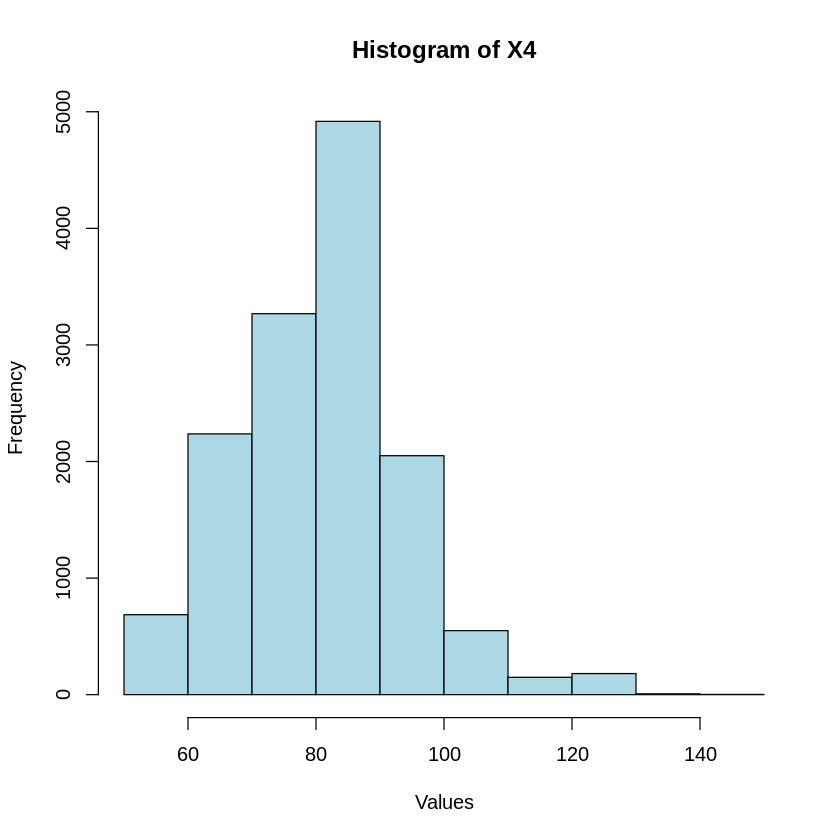

In [15]:
#Histogram
hist(X$X4,
     main = "Histogram of X4",
     xlab = "Values",
     ylab = "Frequency",
     col = "lightblue",
     border = "black",
     breaks = 10)


In [16]:
#Finding mean and median
median(X$X4, na.rm = TRUE)
mean(X$X4, na.rm = TRUE)

[1] 81.84167

[1] 81.1745

In [17]:
#Filling missing values with median
X$X4[is.na(X$X4)] <-
  median(X$X4, na.rm = TRUE)


In [18]:
head(X,3)

,X1,X2,X3,X4,X5,X6
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,13.34167,1.8644,0,81.84167,0,0
2,13.54167,1.9646,0,81.84167,0,0
3,13.71667,2.0648,0,81.84167,0,0


In [19]:
# importing time series data
n <- nrow(X)
time_index <- 1:n

In [20]:
#Bind time index to both datasets

X$time <- time_index
Y$time <- time_index

In [21]:
# Merge by time
full_data <- merge(X, Y, by = "time")


In [22]:
head(X)

,X1,X2,X3,X4,X5,X6,time
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
1,13.34167,1.8644,0,81.84167,0,0,1
2,13.54167,1.9646,0,81.84167,0,0,2
3,13.71667,2.0648,0,81.84167,0,0,3
4,13.90833,2.1650,0,81.84167,0,0,4
5,14.10417,2.2652,0,81.84167,0,0,5
6,14.28750,2.3654,0,81.84167,0,0,6


In [23]:
#Convert to Time-series
ts_x <- ts(full_data[, c("X1","X2","X3","X4","X5","X6")], frequency = 1)
ts_y <- ts(full_data$y, frequency = 1)


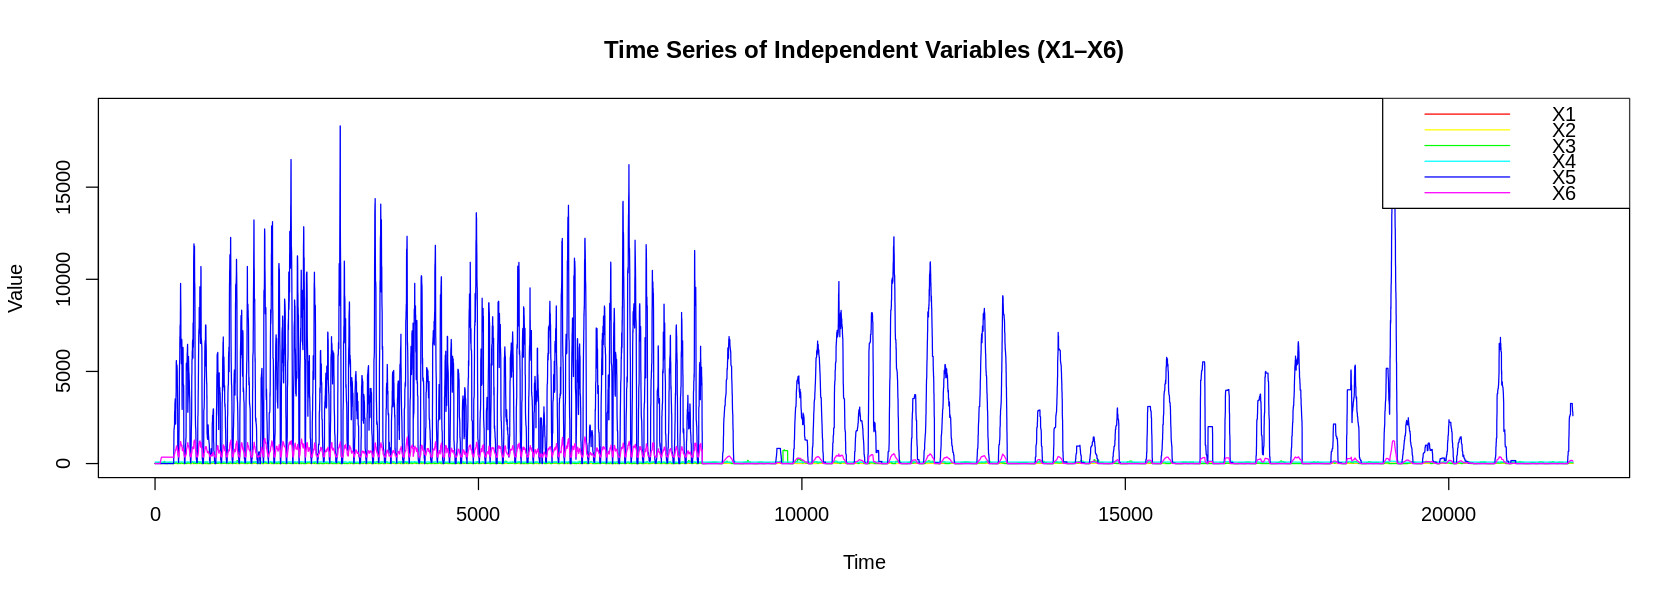

In [24]:
# Time Series of Independent Variables
options(repr.plot.width=14, repr.plot.height=5)
matplot(ts_x, type = "l", lty = 1,
        col = rainbow(6),
        main = "Time Series of Independent Variables (X1–X6)",
        xlab = "Time", ylab = "Value")
legend("topright", legend = colnames(ts_x), col = rainbow(6), lty = 1)


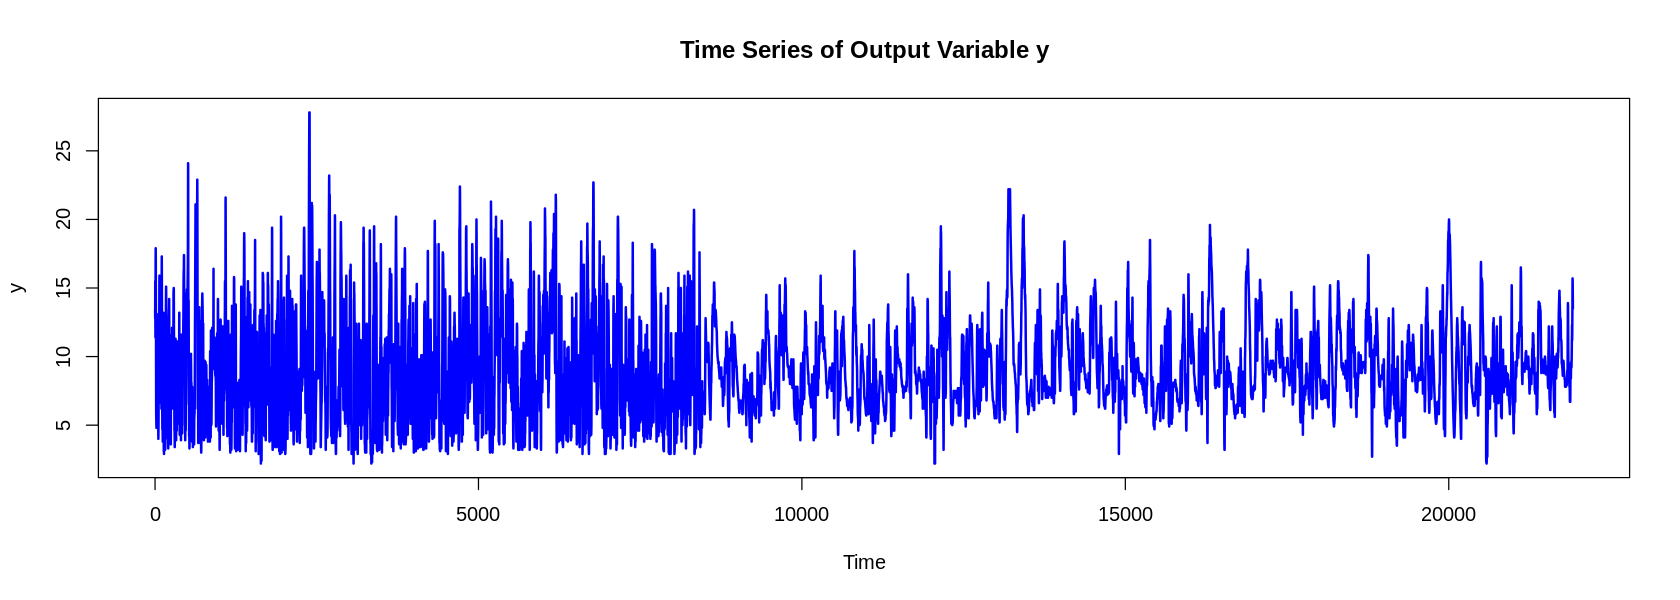

In [25]:
# Time-series of target Variable
options(repr.plot.width=14, repr.plot.height=5)
plot(ts_y,
     type = "l",
     col = "blue",
     lwd = 2,
     main = "Time Series of Output Variable y",
     xlab = "Time",
     ylab = "y")


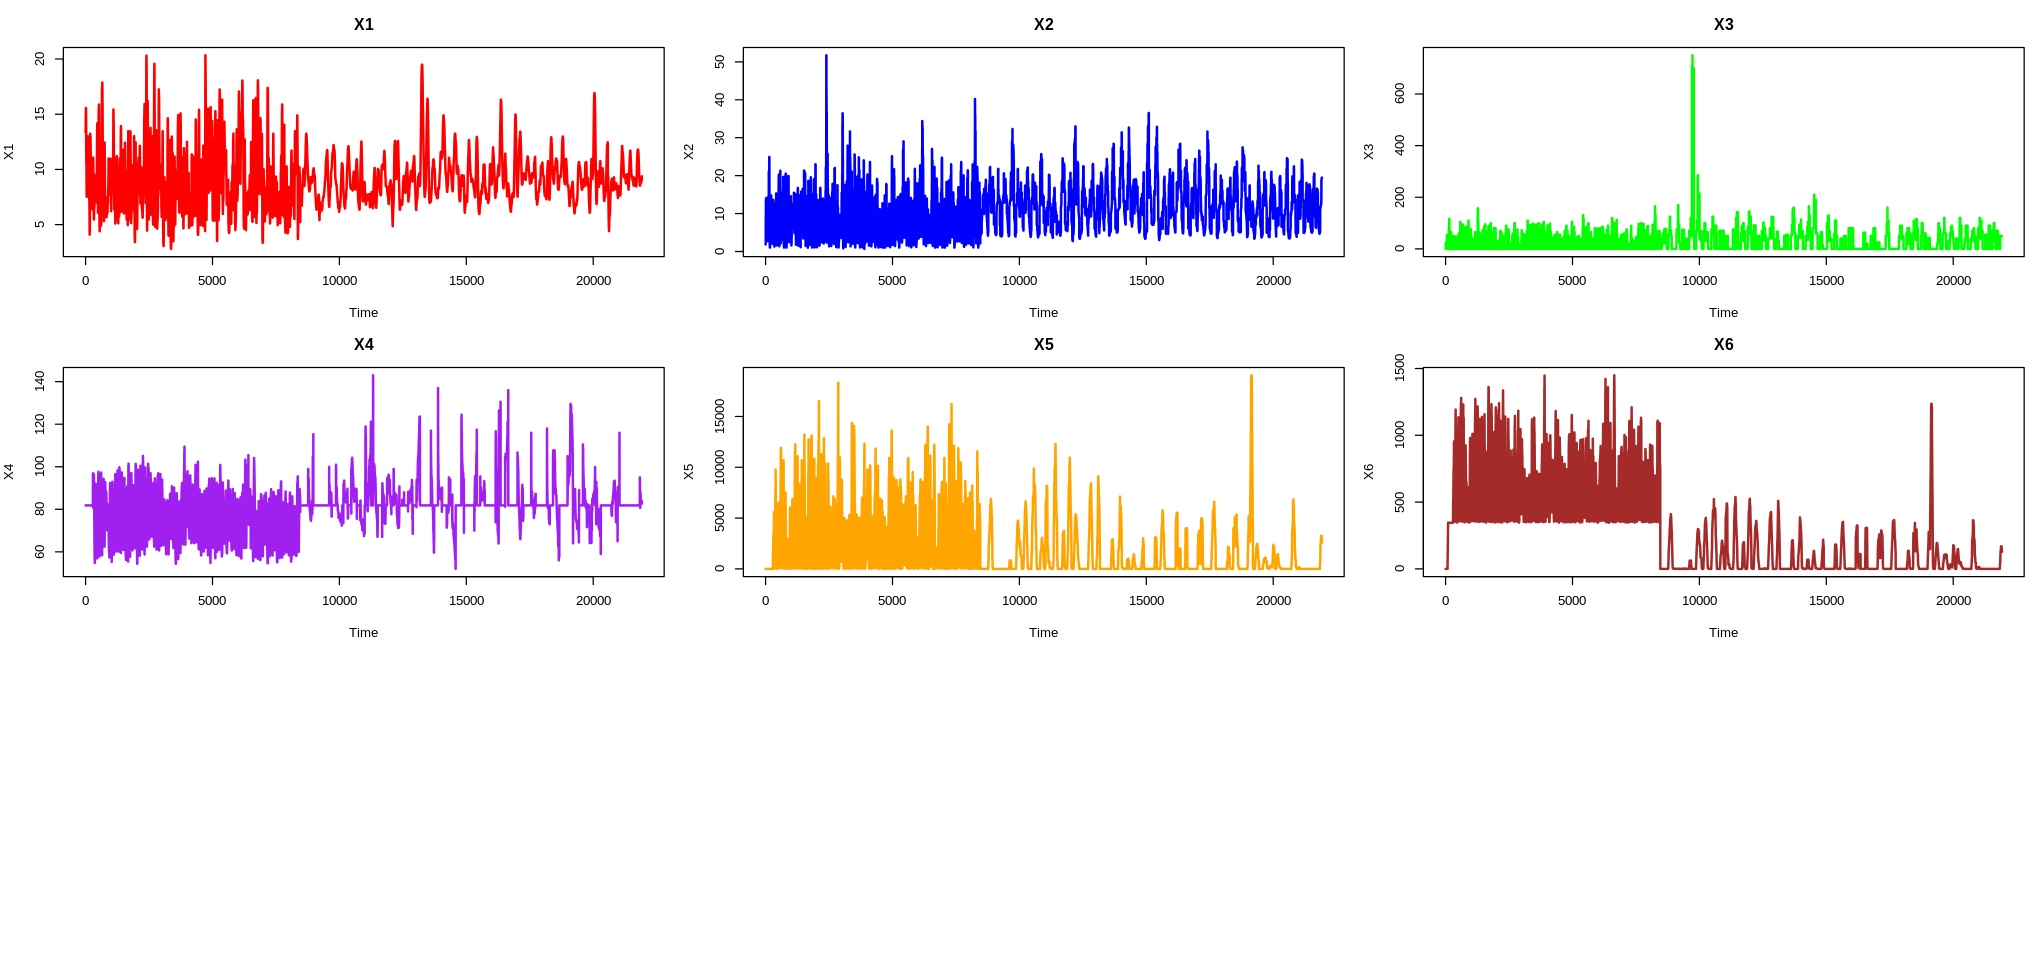

In [26]:
# All the time series plot
options(repr.plot.width=17, repr.plot.height=8)
par(mfrow = c(3, 3), mar = c(4,4,3,1))   # 1 row, 6 columns

input_names <- c("X1","X2","X3","X4","X5","X6")
plot_colors <- c("red", "blue", "green", "purple", "orange", "brown")

for(i in 1:length(input_names)) {
    var <- input_names[i]
    plot(ts(full_data[[var]], frequency = 1),
         type = "l",
         col = plot_colors[i],
         lwd = 2,
         main = var,
         xlab = "Time",
         ylab = var)
}


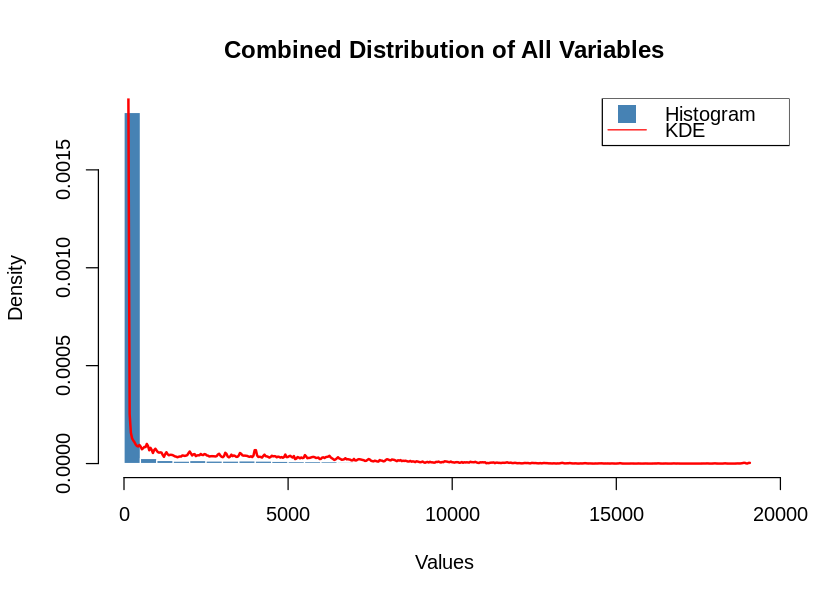

In [27]:
# Combine all variables into one vector
options(repr.plot.width=7, repr.plot.height=5)
all_data <- c(X$X1, X$X2, X$X3, X$X4, X$X5)

# Single histogram with KDE
hist(all_data,
     main = "Combined Distribution of All Variables",
     xlab = "Values",
     col = "steelblue",
     border = "white",
     probability = TRUE,
     breaks = 30)

# Add density curve
lines(density(all_data), col = "red", lwd = 2)

# Add legend
legend("topright",
       legend = c("Histogram", "KDE"),
       col = c("steelblue", "red"),
       lty = c(NA, 1),
       pch = c(15, NA),
       pt.cex = 2)

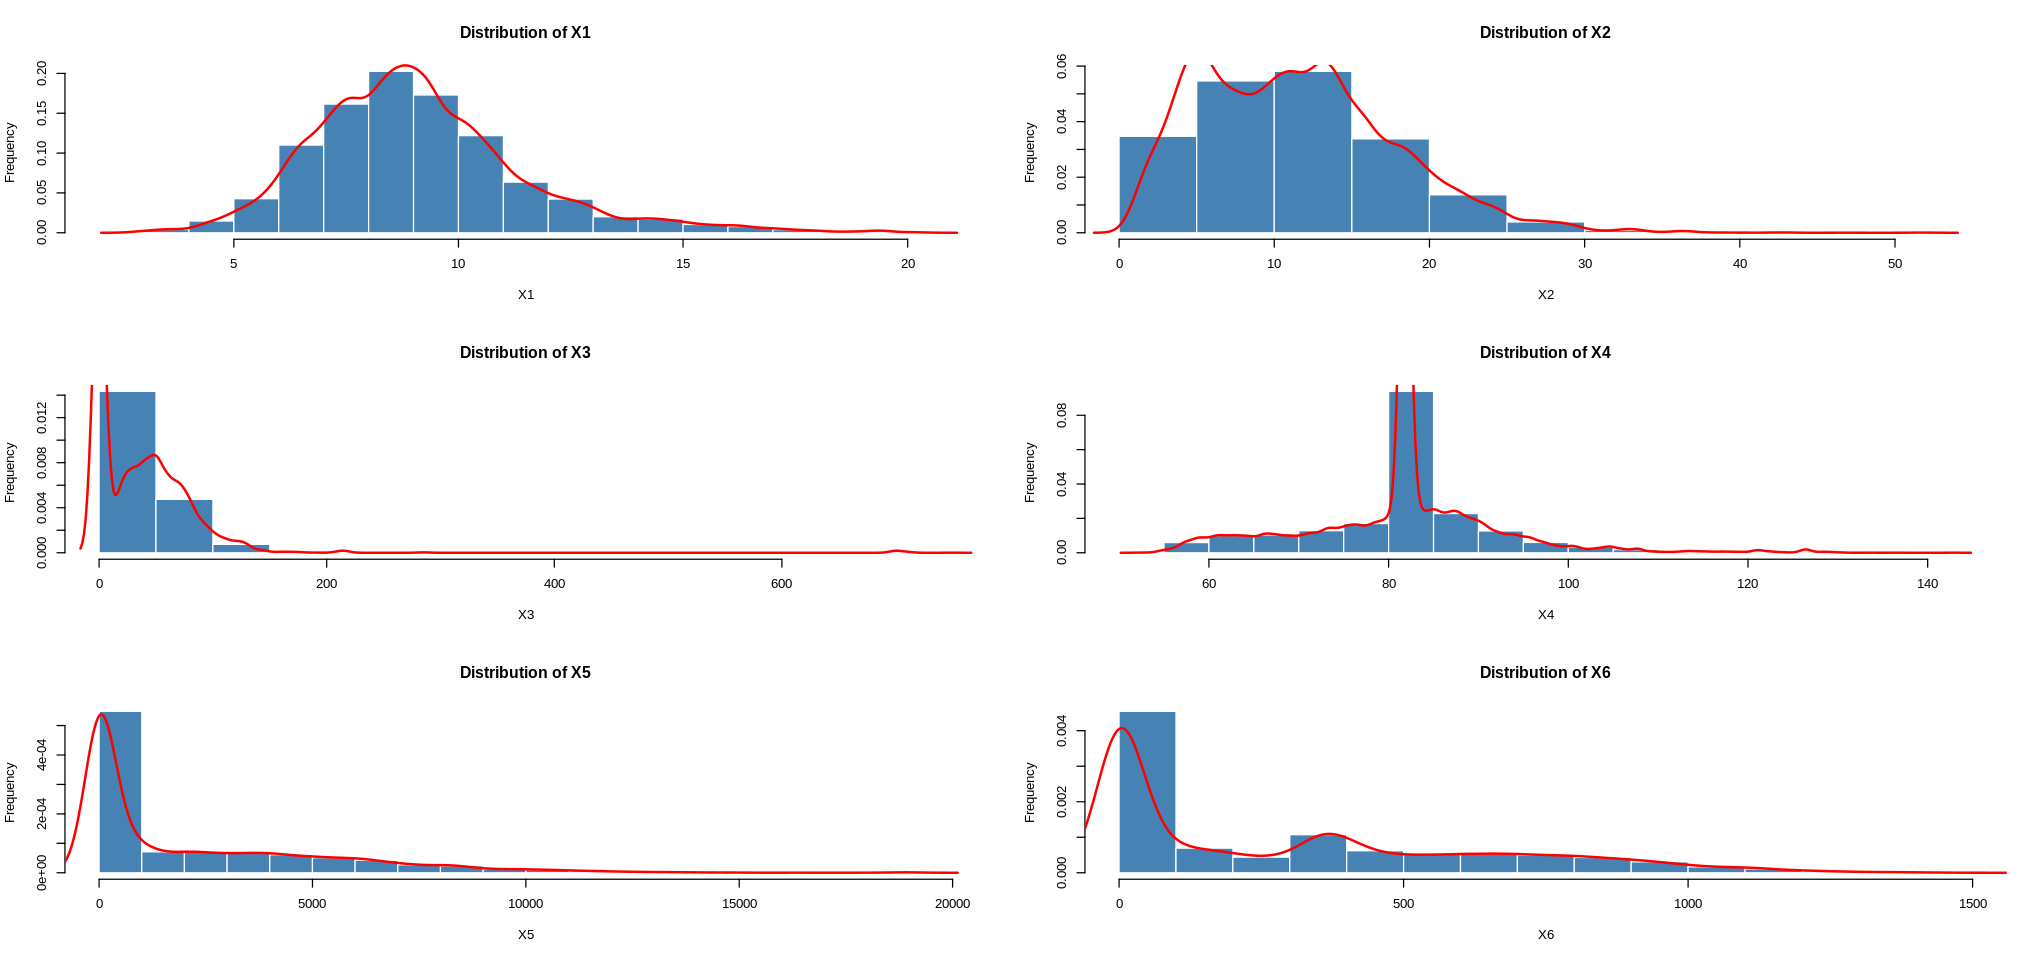

In [28]:
#Histogram of all the dependent variables
options(repr.plot.width=17, repr.plot.height=8)
par(mfrow = c(3, 2))
for (col in c("X1", "X2", "X3", "X4", "X5","X6")) {
  hist(X[[col]],
  main = paste("Distribution of", col),
  xlab = col,
  ylab = "Frequency",
  col = "steelblue",
  border = "white",
  probability = TRUE)
  lines(density(X[[col]]),
  col = "red",
  lwd = 2)
}

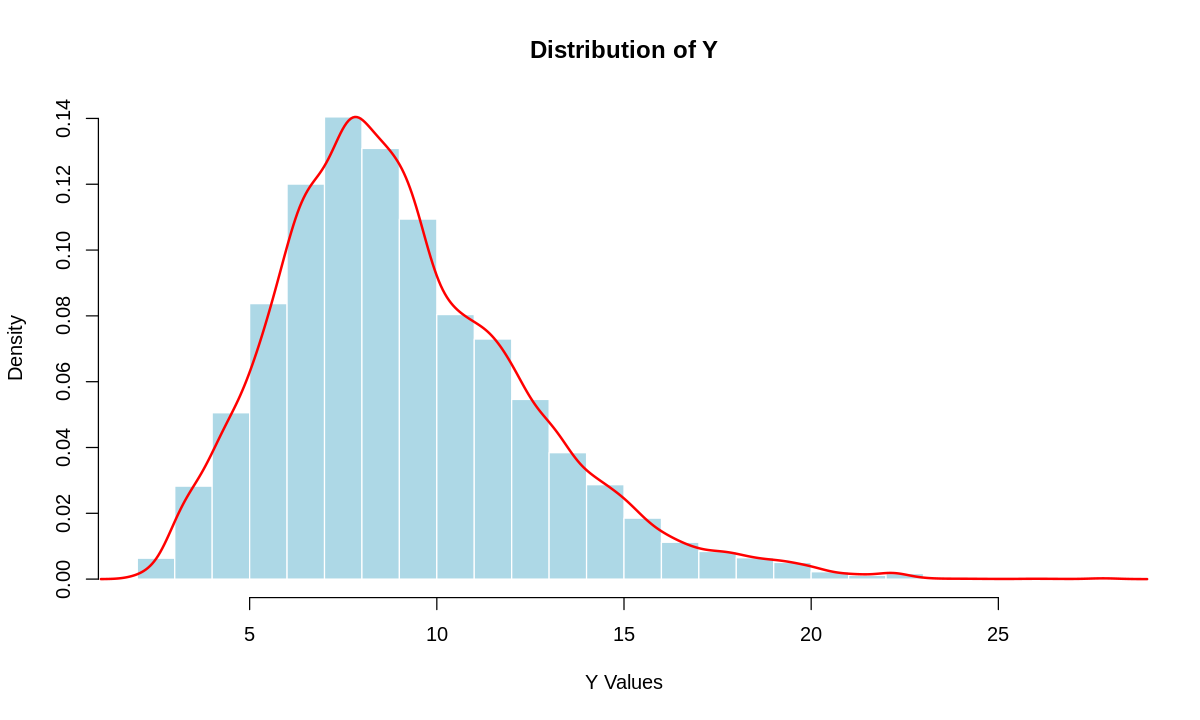

In [29]:
#Histogram of Y
options(repr.plot.width=10, repr.plot.height=6)
hist(Y$y,
     main = "Distribution of Y",
     xlab = "Y Values",
     ylab = "Density",
     col = "lightblue",
     border = "white",
     probability = TRUE,  # For density scale
     breaks = 20)

# Add KDE (density curve)
lines(density(Y$y, na.rm = TRUE), col = "red", lwd = 2)


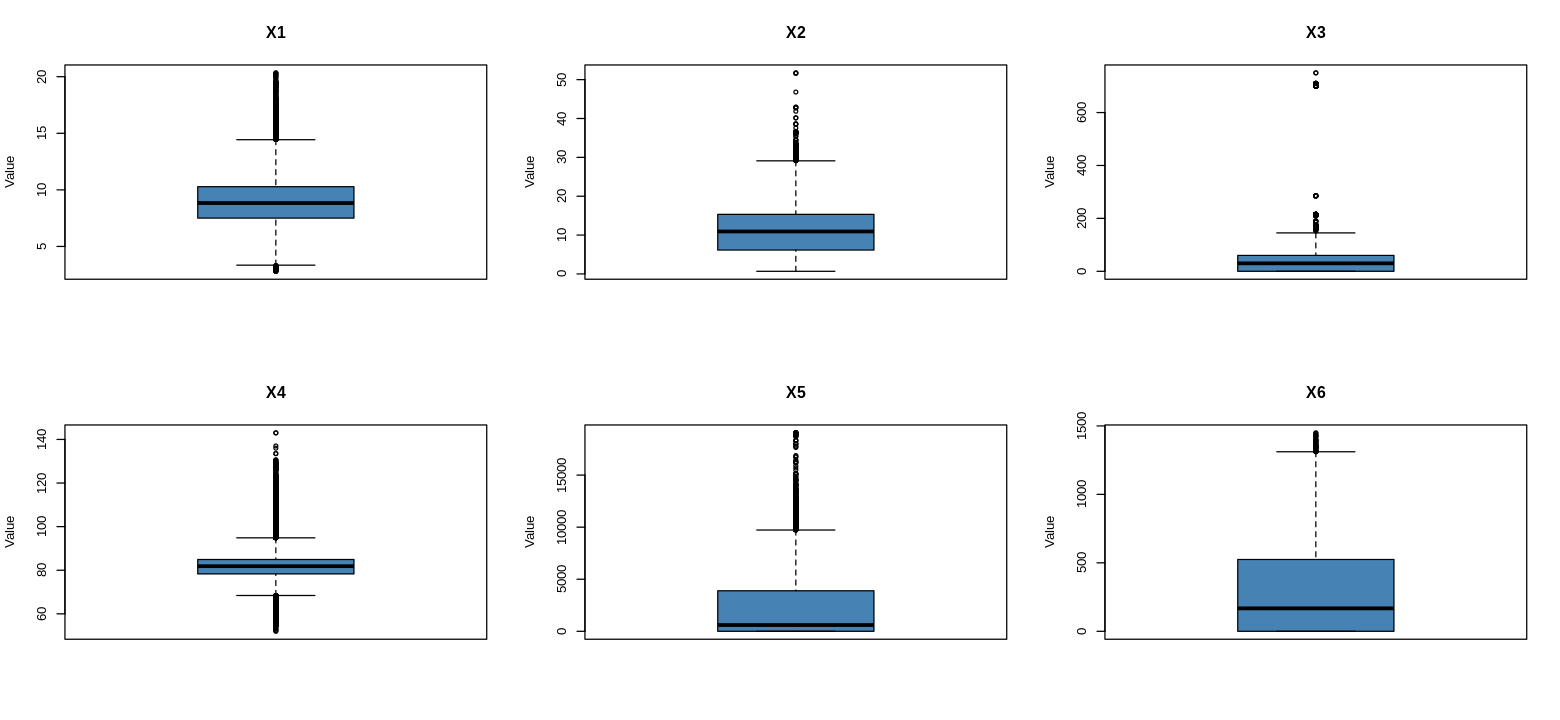

In [30]:
# Set up 2x3 grid
options(repr.plot.width=13, repr.plot.height=6)
par(mfrow = c(2, 3))

# Boxplot for each variable
for (col in c("X1", "X2", "X3", "X4", "X5","X6")) {
  boxplot(X[[col]],
          main = col,
          ylab = "Value",
          col = "steelblue")
}

In [31]:
#Display dataset dimensions
n <- nrow(X)
p <- ncol(Y)

cat("Dataset dimensions: n =", n, "samples, p =", p, "features\n")
cat("Features: bg_mean, insulin_sum, carbs_sum, hr_mean, steps_sum, cals_sum\n")
cat("Target: bg+1:00 (blood glucose at t+1:00)\n")
cat("Missing values: ALL FILLED WITH MEDIAN\n")
cat("  - hr_mean: 7,872 missing values filled with median = 81.84166667\n\n")



Dataset dimensions: n = 21919 samples, p = 2 features
Features: bg_mean, insulin_sum, carbs_sum, hr_mean, steps_sum, cals_sum
Target: bg+1:00 (blood glucose at t+1:00)
Missing values: ALL FILLED WITH MEDIAN
  - hr_mean: 7,872 missing values filled with median = 81.84166667



In [32]:
names(X)

[1] "X1"   "X2"   "X3"   "X4"   "X5"   "X6"   "time"

In [33]:
# Remove time column
X <- X[ , !(names(X) == "time")]


In [34]:
head(X)

,X1,X2,X3,X4,X5,X6
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,13.34167,1.8644,0,81.84167,0,0
2,13.54167,1.9646,0,81.84167,0,0
3,13.71667,2.0648,0,81.84167,0,0
4,13.90833,2.1650,0,81.84167,0,0
5,14.10417,2.2652,0,81.84167,0,0
6,14.28750,2.3654,0,81.84167,0,0


In [35]:
X <- X[ , !(names(X) == "time")]
# Combine X and Y
data <- cbind(X, Y)
data <- data[ , !(names(data) == "time")]
# Correlation matrix
cor_matrix <- cor(data)

# Print correlation matrix
print(cor_matrix)


            X1          X2          X3          X4          X5           X6
X1  1.00000000  0.32493884 0.042570439 -0.12180398 -0.12375025 -0.122487119
X2  0.32493884  1.00000000 0.558863309  0.27807572  0.10911998 -0.064078342
X3  0.04257044  0.55886331 1.000000000  0.08084209  0.07040137  0.003473431
X4 -0.12180398  0.27807572 0.080842085  1.00000000  0.40620215  0.084490528
X5 -0.12375025  0.10911998 0.070401365  0.40620215  1.00000000  0.808073684
X6 -0.12248712 -0.06407834 0.003473431  0.08449053  0.80807368  1.000000000
y   0.24927835  0.07166689 0.060037250 -0.04979208 -0.08838207 -0.077042390
             y
X1  0.24927835
X2  0.07166689
X3  0.06003725
X4 -0.04979208
X5 -0.08838207
X6 -0.07704239
y   1.00000000


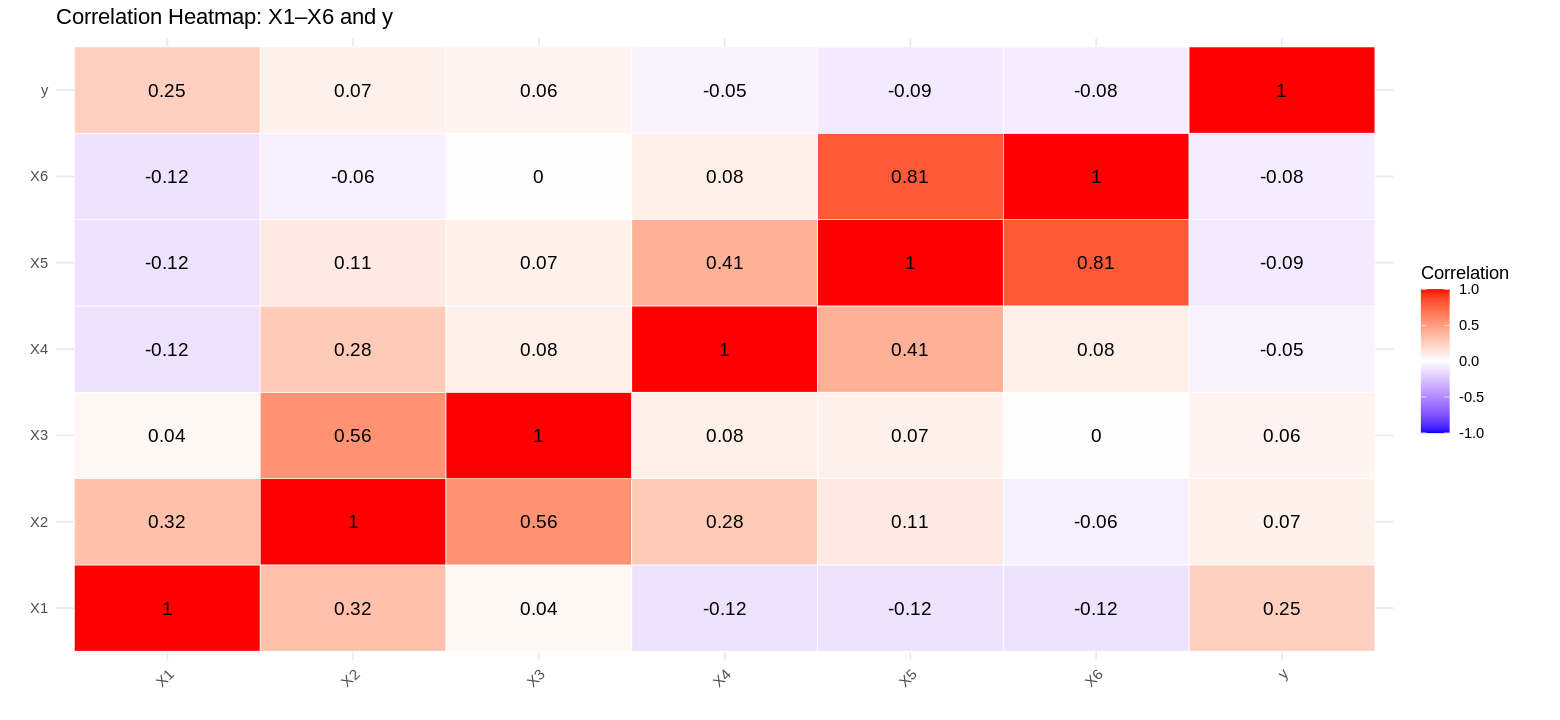

In [36]:

# Correlation matrix
cor_long <- as.data.frame(as.table(cor(data)))

# Correlation heatmap
ggplot(cor_long, aes(x = Var1, y = Var2, fill = Freq)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue",
                       mid = "white",
                       high = "red",
                       midpoint = 0,
                       limits = c(-1, 1),
                       name = "Correlation") +
  geom_text(aes(label = round(Freq, 2)), size = 4) +
  labs(title = "Correlation Heatmap: X1–X6 and y",
       x = "",
       y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


`geom_smooth()` using formula = 'y ~ x'


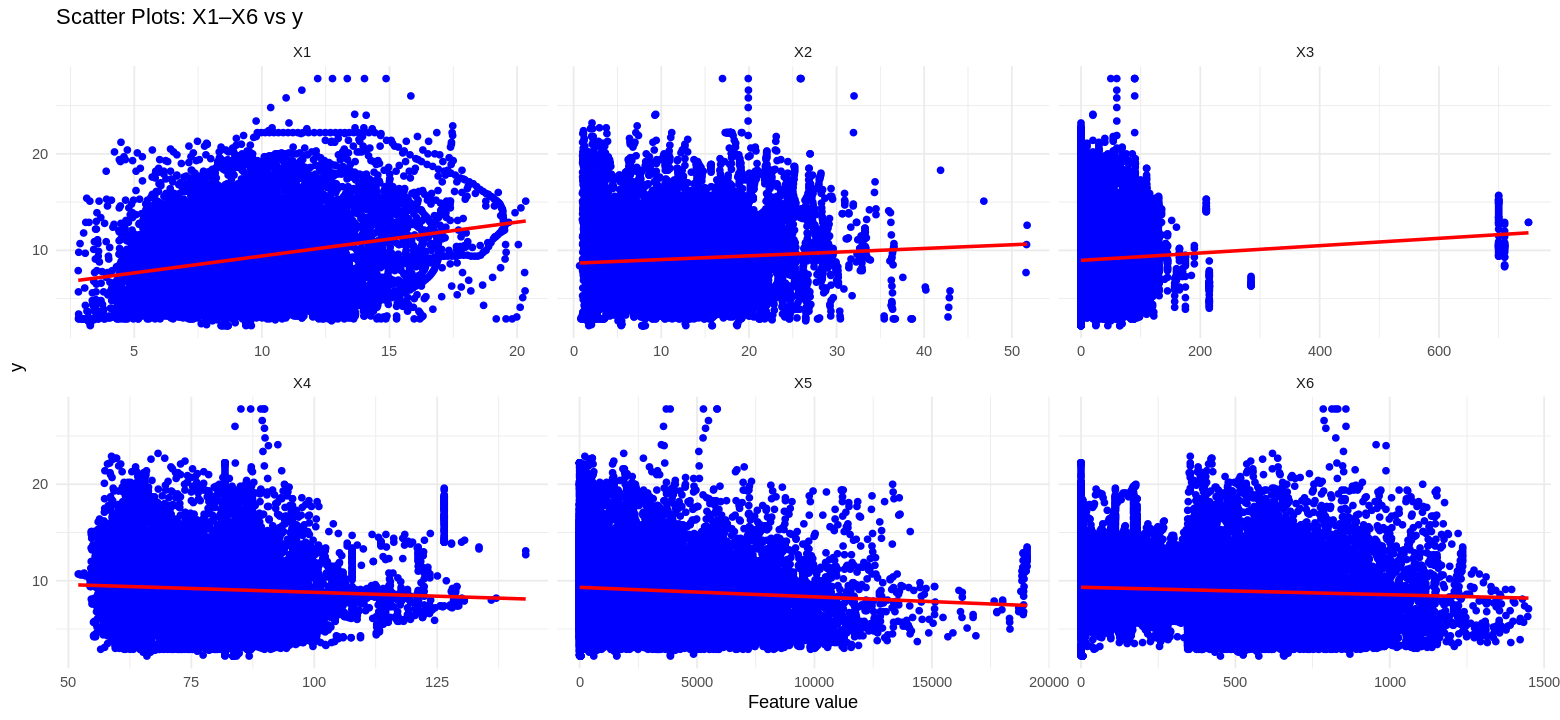

In [37]:
#Scatter plot
data_long <- pivot_longer(data,
                          cols = starts_with("X"),
                          names_to = "Feature",
                          values_to = "Value")

# Scatter plots
ggplot(data_long, aes(x = Value, y = y)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  facet_wrap(~ Feature, scales = "free_x") +
  labs(title = "Scatter Plots: X1–X6 vs y",
       x = "Feature value",
       y = "y") +
  theme_minimal()



In [39]:
X$y <- Y$y
cat("\nTASK 2.1: Estimating model parameters using Least Squares (lm)...\n")

# Model 1
X1_model1 <- lm(
  y ~ I(X1^3) + I(X2^2) + I(X3^2) + X4 + X5 + X6,
  data = X
)

# Model 2
X1_model2 <- lm(
  y ~ I(X1^2) + I(X2^2) + I(X3^3) + X4 + X5 + X6,
  data = X
)

# Model 3
X1_model3 <- lm(
  y ~ X1 + X2 + X3 + I(X4^2) + X5 + I(X6^2),
  data = X
)

# Model 4
X1_model4 <- lm(
  y ~ I(X1^2) + I(X2^2) + I(X3^2) +
       I(X4^2) + I(X5^2) + I(X6^2),
  data = X
)

# Model 5
X1_model5 <- lm(
  y ~ X1 + X2 + X3 + X4 + X5 + X6 +
       I(X1*X2) + I(X3*X4) + I(X2*X6),
  data = X
)

#m1.m2m3
# Store models in a list
models <- list(X1_model1, X1_model2, X1_model3, X1_model4, X1_model5)

theta_hat_1 <- coef(X1_model1)
theta_hat_2 <- coef(X1_model2)
theta_hat_3 <- coef(X1_model3)
theta_hat_4 <- coef(X1_model4)
theta_hat_5 <- coef(X1_model5)

# Extract theta-hat using a for loop
for (i in 1:5) {
  cat("\n--- Theta-hat for Model", i, "---\n")
  theta_hat <- coef(models[[i]])
  print(theta_hat)
}



TASK 2.1: Estimating model parameters using Least Squares (lm)...

--- Theta-hat for Model 1 ---
  (Intercept)       I(X1^3)       I(X2^2)       I(X3^2)            X4 
 8.498080e+00  7.834706e-04  7.109004e-04  3.556409e-06 -7.966442e-04 
           X5            X6 
-5.121151e-05 -2.530476e-04 

--- Theta-hat for Model 2 ---
  (Intercept)       I(X1^2)       I(X2^2)       I(X3^3)            X4 
 7.841521e+00  1.482185e-02  5.518327e-04  4.472735e-09  2.168418e-04 
           X5            X6 
-5.908151e-05 -1.258977e-04 

--- Theta-hat for Model 3 ---
  (Intercept)            X1            X2            X3       I(X4^2) 
 5.834997e+00  3.665672e-01 -3.665405e-02  5.567370e-03  4.708157e-05 
           X5       I(X6^2) 
-2.471280e-05 -5.709349e-07 

--- Theta-hat for Model 4 ---
  (Intercept)       I(X1^2)       I(X2^2)       I(X3^2)       I(X4^2) 
 7.670595e+00  1.513958e-02  3.210937e-04  3.746117e-06  2.634876e-05 
      I(X5^2)       I(X6^2) 
-2.850761e-09 -5.843070e-07 

--- Thet

In [40]:
y_vec <- X$y

y_pred_1 <- model.matrix(X1_model1) %*% theta_hat_1
residuals_1 <- y_vec - y_pred_1

y_pred_2 <- model.matrix(X1_model2) %*% theta_hat_2
residuals_2 <- y_vec - y_pred_2

y_pred_3 <- model.matrix(X1_model3) %*% theta_hat_3
residuals_3 <- y_vec - y_pred_3

y_pred_4 <- model.matrix(X1_model4) %*% theta_hat_4
residuals_4 <- y_vec - y_pred_4

y_pred_5 <- model.matrix(X1_model5) %*% theta_hat_5
residuals_5 <- y_vec - y_pred_5

cat("Predictions generated for all models.\n\n")

Predictions generated for all models.



2.2 Finding predictions and residules for all model


In [73]:
RSS_1 <- sum(residuals(X1_model1)^2)
RSS_2<- sum(residuals(X1_model2)^2)
RSS_3 <- sum(residuals(X1_model3)^2)
RSS_4<- sum(residuals(X1_model4)^2)
RSS_5 <- sum(residuals(X1_model5)^2)




cat("RSS of Model 1:", format(RSS_1, scientific=FALSE), "\n")
cat("RSS of Model 2:", format(RSS_2, scientific=FALSE), "\n")
cat("RSS of Model 3:", format(RSS_3, scientific=FALSE), "\n")
cat("RSS of Model 4:", format(RSS_4, scientific=FALSE), "\n")
cat("RSS of Model 5:", format(RSS_5, scientific=FALSE), "\n\n")


RSS of Model 1: 233719.1 
RSS of Model 2: 232196.5 
RSS of Model 3: 229824.3 
RSS of Model 4: 231818.3 
RSS of Model 5: 218115.1 



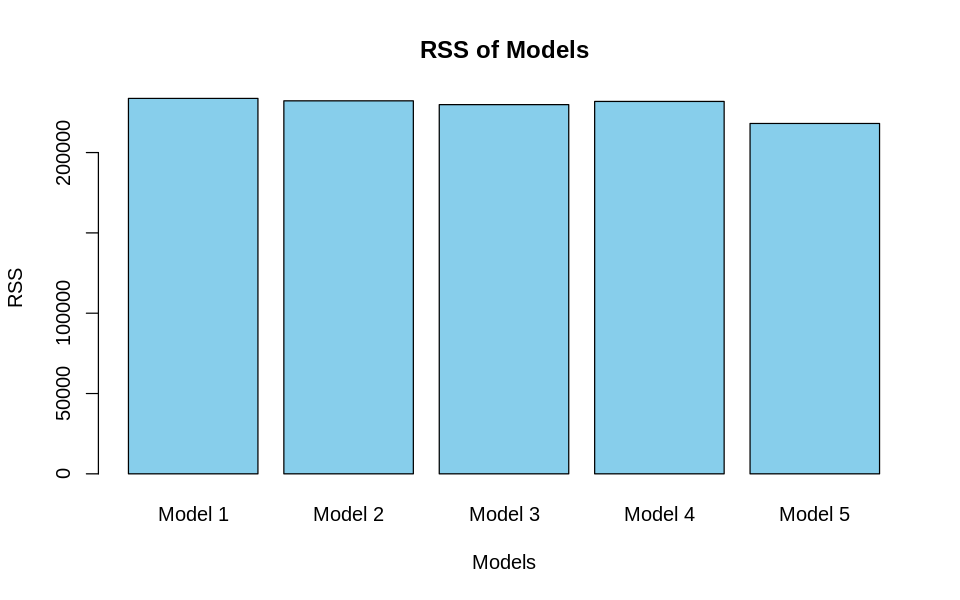

In [42]:
# Bar diagram of Rss of models
options(repr.plot.width=8, repr.plot.height=5)

rss <- c(233719.1,
         232196.5,
         229824.3,
         231818.3,
         218115.1)

models <- c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5")

barplot(rss,
        names.arg = models,
        main = "RSS of Models",
        xlab = "Models",
        ylab = "RSS",
        col = "skyblue")



2.3 Log-likelihood for each model

In [43]:
#Computing log-likelihood function
sigma2_1 <- RSS_1 / n
sigma2_2 <- RSS_2 / n
sigma2_3 <- RSS_3 / n
sigma2_4 <- RSS_4 / n
sigma2_5 <- RSS_5 / n

cat("Estimated Variances (σ̂²):\n")
cat("Model 1 σ̂²:", format(sigma2_1, scientific=FALSE), "\n")
cat("Model 2 σ̂²:", format(sigma2_2, scientific=FALSE), "\n")
cat("Model 3 σ̂²:", format(sigma2_3, scientific=FALSE), "\n")
cat("Model 4 σ̂²:", format(sigma2_4, scientific=FALSE), "\n")
cat("Model 5 σ̂²:", format(sigma2_5, scientific=FALSE), "\n\n")

# Log-likelihood computation
ll_1 <- -n/2 * log(2*pi) - n/2 * log(sigma2_1) - RSS_1 / (2 * sigma2_1)
ll_2 <- -n/2 * log(2*pi) - n/2 * log(sigma2_2) - RSS_2 / (2 * sigma2_2)
ll_3 <- -n/2 * log(2*pi) - n/2 * log(sigma2_3) - RSS_3 / (2 * sigma2_3)
ll_4 <- -n/2 * log(2*pi) - n/2 * log(sigma2_4) - RSS_4 / (2 * sigma2_4)
ll_5 <- -n/2 * log(2*pi) - n/2 * log(sigma2_5) - RSS_5 / (2 * sigma2_5)

cat("Log-Likelihood Values:\n")
cat("Model 1 LL:", format(ll_1, scientific=FALSE), "\n")
cat("Model 2 LL:", format(ll_2, scientific=FALSE), "\n")
cat("Model 3 LL:", format(ll_3, scientific=FALSE), "\n")
cat("Model 4 LL:", format(ll_4, scientific=FALSE), "\n")
cat("Model 5 LL:", format(ll_5, scientific=FALSE), "\n\n")


Estimated Variances (σ̂²):
Model 1 σ̂²: 10.66285 
Model 2 σ̂²: 10.59339 
Model 3 σ̂²: 10.48516 
Model 4 σ̂²: 10.57613 
Model 5 σ̂²: 9.95096 

Log-Likelihood Values:
Model 1 LL: -57040.29 
Model 2 LL: -56968.66 
Model 3 LL: -56856.11 
Model 4 LL: -56950.79 
Model 5 LL: -56283.02 



2.4 AIC and BIC



In [44]:
# Number of parameters
k_1 <- 7  # 6 features + intercept
k_2 <- 7
k_3 <- 7
k_4 <- 7
k_5 <- 10  # 6 features + 3 interactions + intercept

# AIC computation
AIC_1 <- -2 * ll_1 + 2 * k_1
AIC_2 <- -2 * ll_2 + 2 * k_2
AIC_3 <- -2 * ll_3 + 2 * k_3
AIC_4 <- -2 * ll_4 + 2 * k_4
AIC_5 <- -2 * ll_5 + 2 * k_5

# BIC computation
BIC_1 <- -2 * ll_1 + k_1 * log(n)
BIC_2 <- -2 * ll_2 + k_2 * log(n)
BIC_3 <- -2 * ll_3 + k_3 * log(n)
BIC_4 <- -2 * ll_4 + k_4 * log(n)
BIC_5 <- -2 * ll_5 + k_5 * log(n)

cat("AIC Values (Lower is Better):\n")
cat("Model 1 (k=7) - AIC:", format(AIC_1, scientific=FALSE), "\n")
cat("Model 2 (k=7) - AIC:", format(AIC_2, scientific=FALSE), "\n")
cat("Model 3 (k=7) - AIC:", format(AIC_3, scientific=FALSE), "\n")
cat("Model 4 (k=7) - AIC:", format(AIC_4, scientific=FALSE), "\n")
cat("Model 5 (k=10) - AIC:", format(AIC_5, scientific=FALSE), "\n\n")

cat("BIC Values (Lower is Better):\n")
cat("Model 1 (k=7) - BIC:", format(BIC_1, scientific=FALSE), "\n")
cat("Model 2 (k=7) - BIC:", format(BIC_2, scientific=FALSE), "\n")
cat("Model 3 (k=7) - BIC:", format(BIC_3, scientific=FALSE), "\n")
cat("Model 4 (k=7) - BIC:", format(BIC_4, scientific=FALSE), "\n")
cat("Model 5 (k=10) - BIC:", format(BIC_5, scientific=FALSE), "\n\n")

best_aic_idx <- which.min(c(AIC_1, AIC_2, AIC_3, AIC_4, AIC_5))
best_bic_idx <- which.min(c(BIC_1, BIC_2, BIC_3, BIC_4, BIC_5))

cat("✓ Best by AIC: Model", best_aic_idx, "\n")
cat("✓ Best by BIC: Model", best_bic_idx, "\n\n")


AIC Values (Lower is Better):
Model 1 (k=7) - AIC: 114094.6 
Model 2 (k=7) - AIC: 113951.3 
Model 3 (k=7) - AIC: 113726.2 
Model 4 (k=7) - AIC: 113915.6 
Model 5 (k=10) - AIC: 112586 

BIC Values (Lower is Better):
Model 1 (k=7) - BIC: 114150.5 
Model 2 (k=7) - BIC: 114007.3 
Model 3 (k=7) - BIC: 113782.2 
Model 4 (k=7) - BIC: 113971.5 
Model 5 (k=10) - BIC: 112666 

✓ Best by AIC: Model 5 
✓ Best by BIC: Model 5 



2.6 Compute residules

In [45]:
compute_residual_stats <- function(residuals, model_name) {
  cat(model_name, ":\n")
  cat("  Mean of residuals:", format(mean(residuals), scientific=TRUE), "\n")
  cat("  Std Dev of residuals:", format(sd(residuals), scientific=FALSE), "\n")
  cat("  Min residual:", format(min(residuals), scientific=FALSE), "\n")
  cat("  Max residual:", format(max(residuals), scientific=FALSE), "\n")

  # Compute skewness
  residual_centered <- residuals - mean(residuals)
  skewness <- (sum(residual_centered^3) / length(residuals)) / (sd(residuals)^3)
  cat("  Skewness:", format(skewness, scientific=FALSE), "\n\n")
}

compute_residual_stats(residuals_1, "Model 1")
compute_residual_stats(residuals_2, "Model 2")
compute_residual_stats(residuals_3, "Model 3")
compute_residual_stats(residuals_4, "Model 4")
compute_residual_stats(residuals_5, "Model 5")

Model 1 :
  Mean of residuals: 3.298357e-15 
  Std Dev of residuals: 3.265477 
  Min residual: -12.67183 
  Max residual: 18.15879 
  Skewness: 0.7831709 

Model 2 :
  Mean of residuals: -1.054189e-15 
  Std Dev of residuals: 3.254823 
  Min residual: -11.52307 
  Max residual: 17.96246 
  Skewness: 0.7695639 

Model 3 :
  Mean of residuals: -3.018908e-15 
  Std Dev of residuals: 3.238154 
  Min residual: -9.007972 
  Max residual: 18.01075 
  Skewness: 0.8086102 

Model 4 :
  Mean of residuals: -1.363334e-15 
  Std Dev of residuals: 3.252171 
  Min residual: -11.11626 
  Max residual: 17.98504 
  Skewness: 0.7914753 

Model 5 :
  Mean of residuals: 3.518867e-16 
  Std Dev of residuals: 3.154586 
  Min residual: -9.357688 
  Max residual: 20.77578 
  Skewness: 0.7997092 



In [46]:
compute_residual_stats <- function(residuals, model_name) {
  cat(model_name, ":\n")
  cat("  Mean of residuals:", format(mean(residuals), scientific=TRUE), "\n")
  cat("  Std Dev of residuals:", format(sd(residuals), scientific=FALSE), "\n")
  cat("  Min residual:", format(min(residuals), scientific=FALSE), "\n")
  cat("  Max residual:", format(max(residuals), scientific=FALSE), "\n")

  # Compute skewness
  residual_centered <- residuals - mean(residuals)
  skewness <- (sum(residual_centered^3) / length(residuals)) / (sd(residuals)^3)
  cat("  Skewness:", format(skewness, scientific=FALSE), "\n\n")
}

compute_residual_stats(residuals_1, "Model 1")
compute_residual_stats(residuals_1, "Model 2")
compute_residual_stats(residuals_3, "Model 3")
compute_residual_stats(residuals_4, "Model 4")
compute_residual_stats(residuals_5, "Model 5")


Model 1 :
  Mean of residuals: 3.298357e-15 
  Std Dev of residuals: 3.265477 
  Min residual: -12.67183 
  Max residual: 18.15879 
  Skewness: 0.7831709 

Model 2 :
  Mean of residuals: 3.298357e-15 
  Std Dev of residuals: 3.265477 
  Min residual: -12.67183 
  Max residual: 18.15879 
  Skewness: 0.7831709 

Model 3 :
  Mean of residuals: -3.018908e-15 
  Std Dev of residuals: 3.238154 
  Min residual: -9.007972 
  Max residual: 18.01075 
  Skewness: 0.8086102 

Model 4 :
  Mean of residuals: -1.363334e-15 
  Std Dev of residuals: 3.252171 
  Min residual: -11.11626 
  Max residual: 17.98504 
  Skewness: 0.7914753 

Model 5 :
  Mean of residuals: 3.518867e-16 
  Std Dev of residuals: 3.154586 
  Min residual: -9.357688 
  Max residual: 20.77578 
  Skewness: 0.7997092 



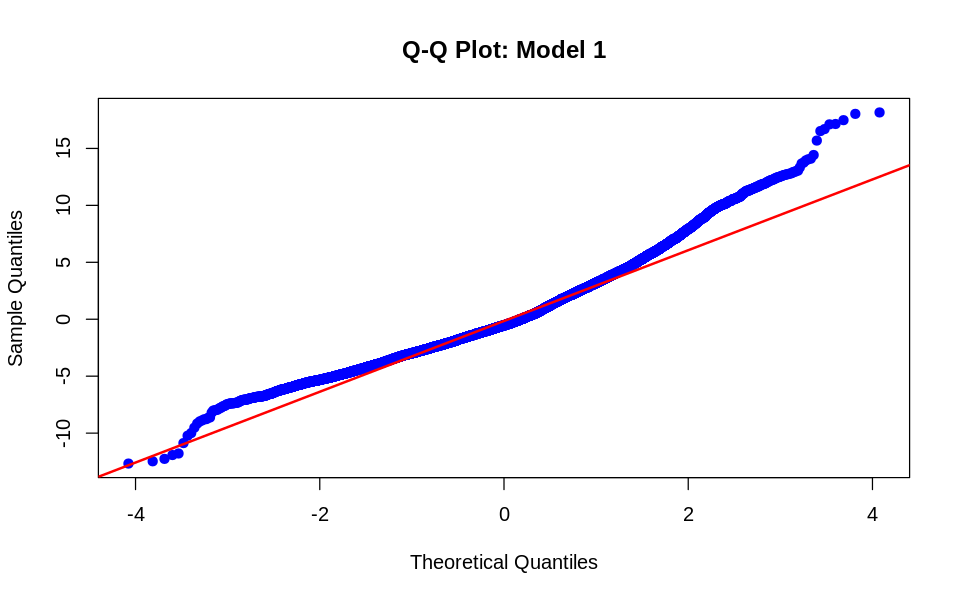

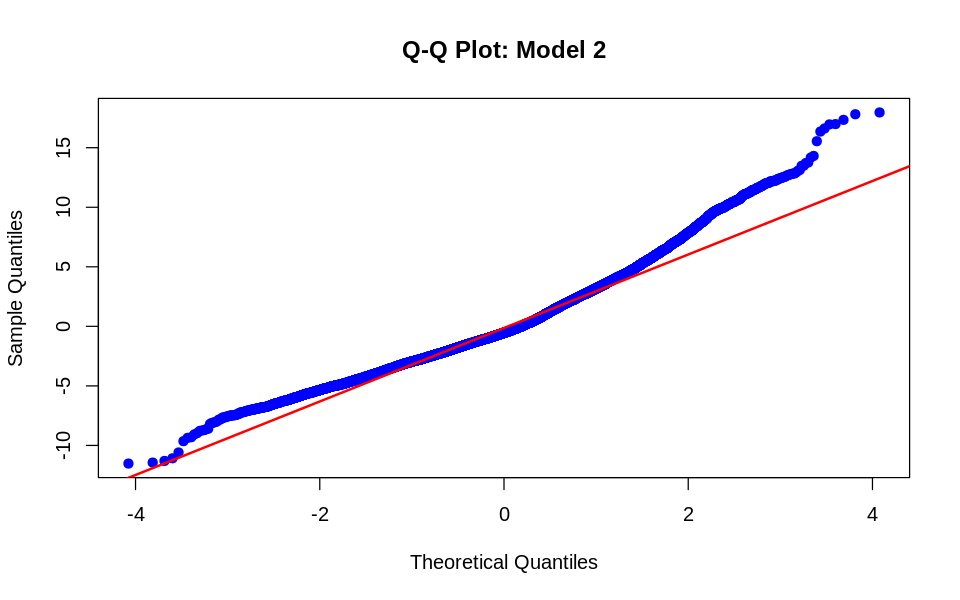

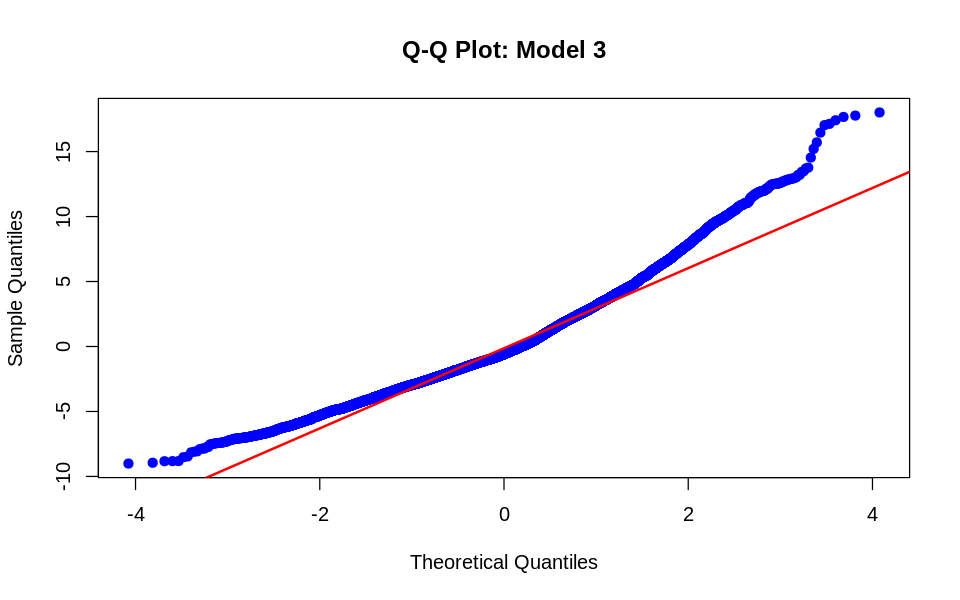

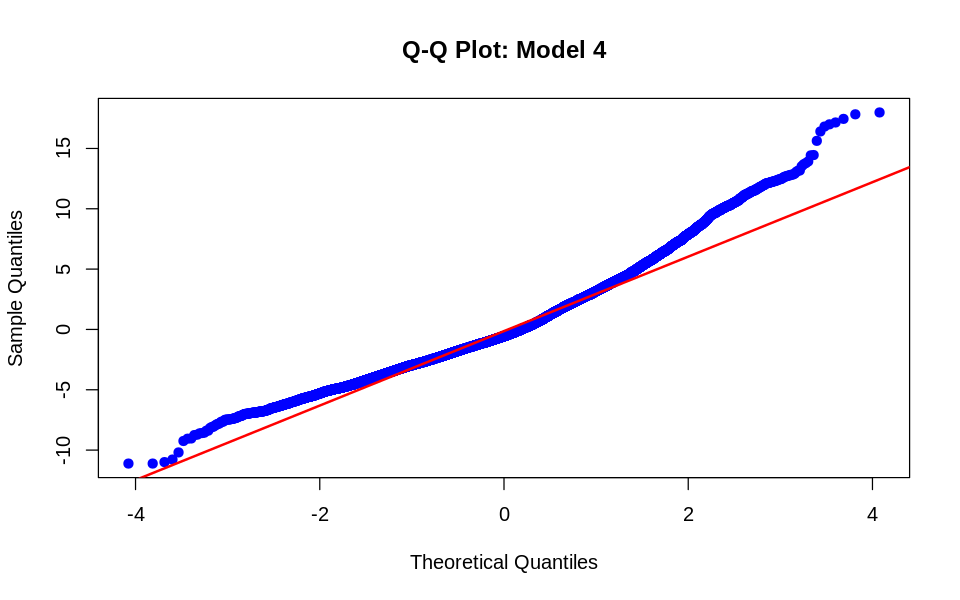

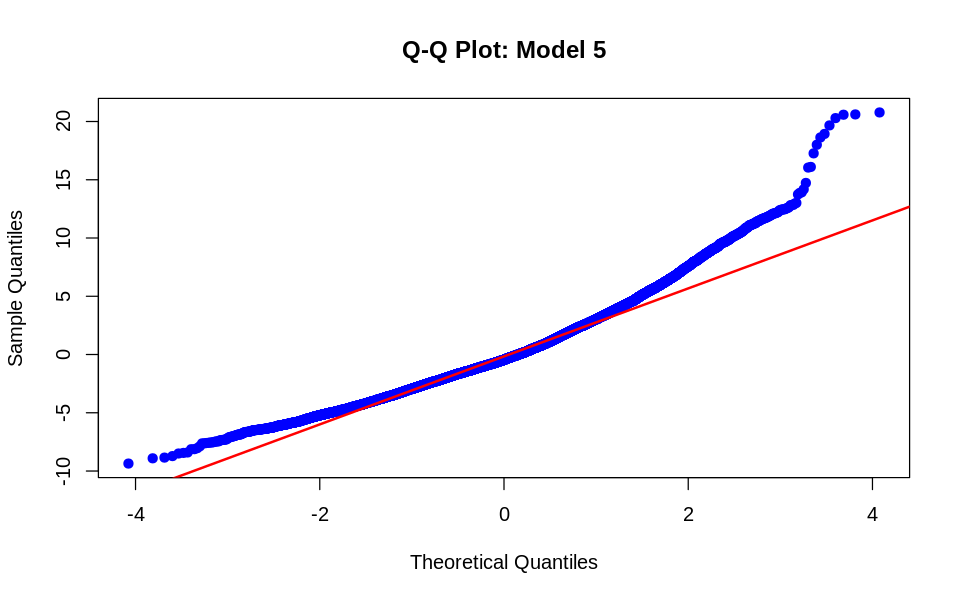

In [47]:
# QQ plot
qqnorm(residuals_1, main = "Q-Q Plot: Model 1", pch = 19, col = "blue")
qqline(residuals_1, col = "red", lwd = 2)

qqnorm(residuals_2, main = "Q-Q Plot: Model 2", pch = 19, col = "blue")
qqline(residuals_2, col = "red", lwd = 2)

qqnorm(residuals_3, main = "Q-Q Plot: Model 3", pch = 19, col = "blue")
qqline(residuals_3, col = "red", lwd = 2)

qqnorm(residuals_4, main = "Q-Q Plot: Model 4", pch = 19, col = "blue")
qqline(residuals_4, col = "red", lwd = 2)

qqnorm(residuals_5, main = "Q-Q Plot: Model 5", pch = 19, col = "blue")
qqline(residuals_5, col = "red", lwd = 2)

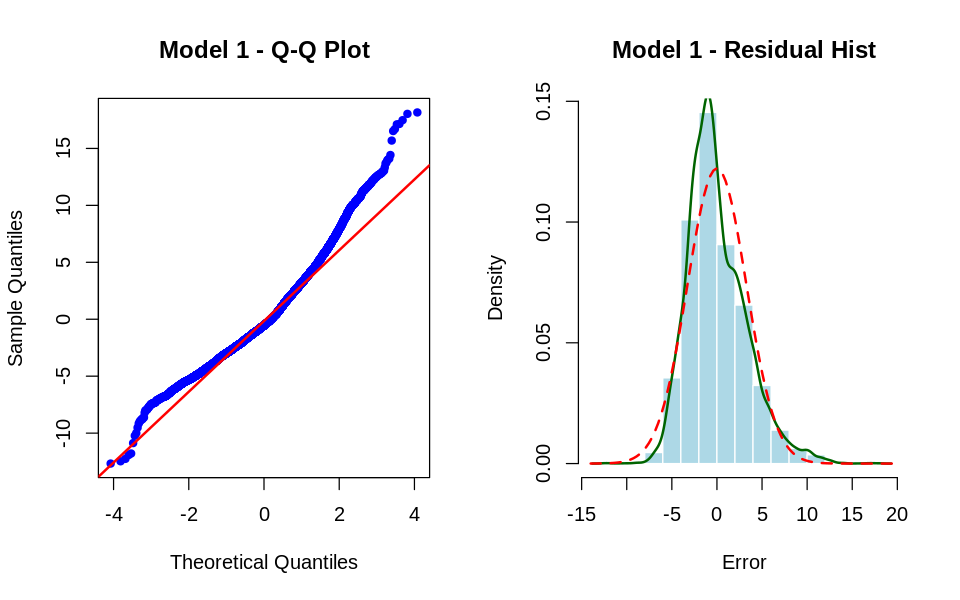

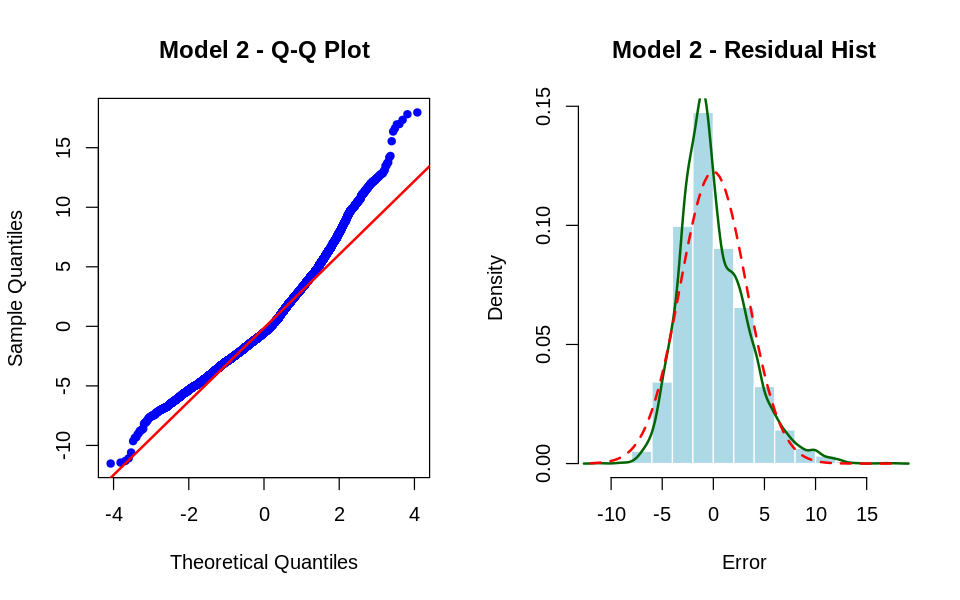

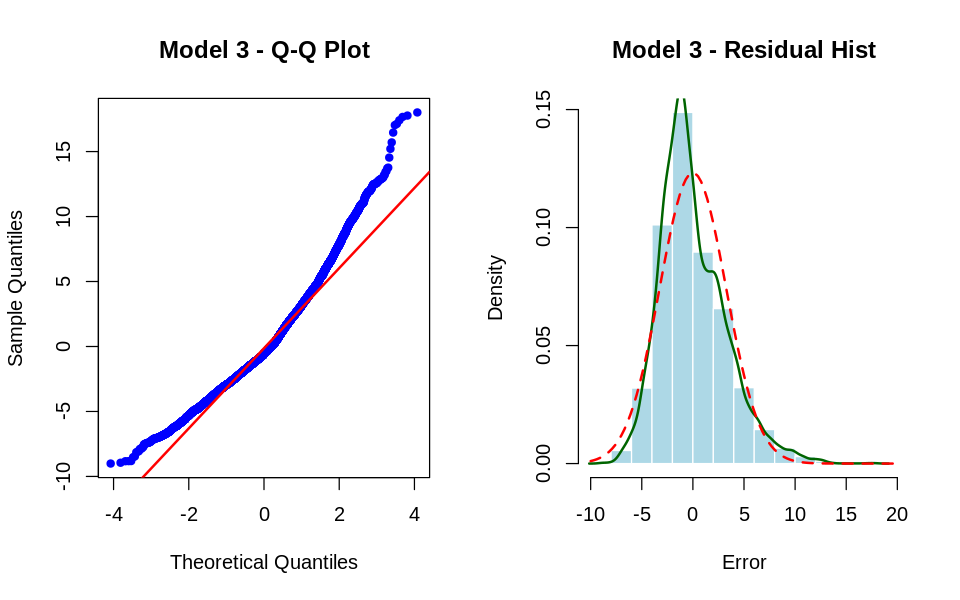

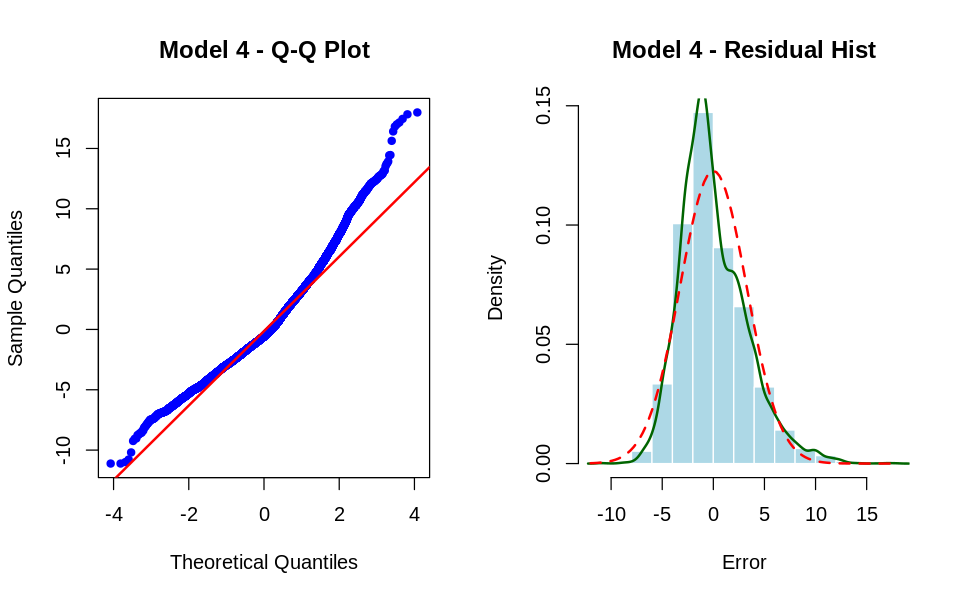

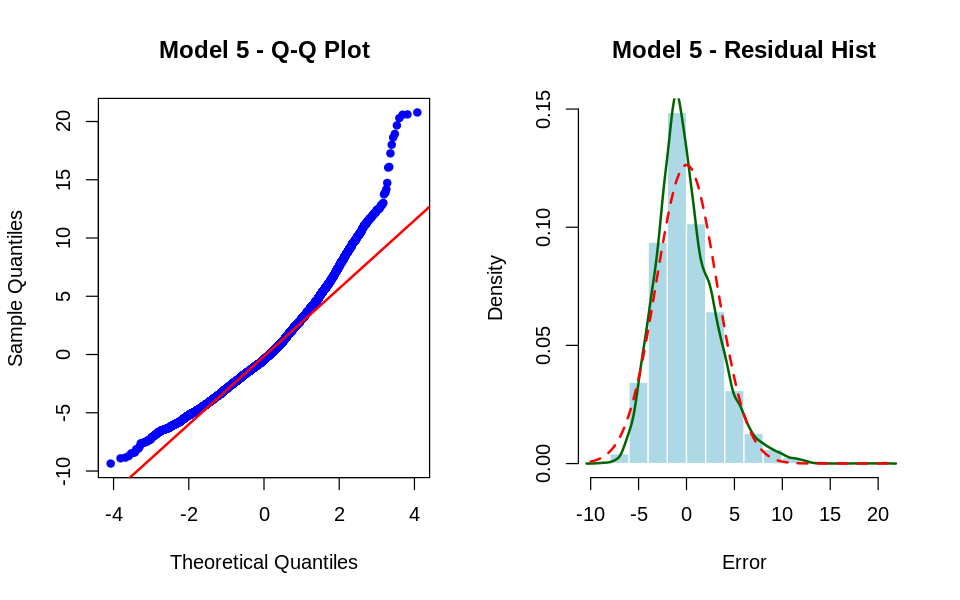

In [48]:
#Side by side histogram and qq plot
y_target <- Y$y
plot_residuals <- function(y_true, design_matrix, theta_hat, model_name) {

  # ---- FIX: convert lm object to numeric design matrix ----
  X_mat <- model.matrix(design_matrix)

  y_hat <- X_mat %*% theta_hat
  residuals <- y_true - y_hat

  par(mfrow = c(1, 2)) # Side-by-side plots

  # Q-Q Plot
  qqnorm(residuals, main = paste(model_name, "- Q-Q Plot"),
         pch = 19, col = "blue", cex = 0.8)
  qqline(residuals, col = "red", lwd = 2)

  # Histogram
  hist(residuals, main = paste(model_name, "- Residual Hist"),
       xlab = "Error", col = "lightblue", border = "white",
       probability = TRUE)
  lines(density(residuals), col = "darkgreen", lwd = 2)
  curve(dnorm(x, mean = mean(residuals), sd = sd(residuals)),
        add = TRUE, col = "red", lty = 2, lwd = 2)

  par(mfrow = c(1, 1)) # Reset
}

# Run for your models
plot_residuals(y_target, X1_model1, theta_hat_1, "Model 1")
plot_residuals(y_target, X1_model2, theta_hat_2, "Model 2")
plot_residuals(y_target, X1_model3, theta_hat_3, "Model 3")
plot_residuals(y_target, X1_model4, theta_hat_4, "Model 4")

if (exists("theta_hat_5")) {
  plot_residuals(y_target, X1_model5, theta_hat_5, "Model 5")
}


comparing table

In [49]:
#Comparing table
comparison_table <- data.frame(
  Model = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5"),
  Parameters = c(k_1, k_2, k_3, k_4, k_5),
  RSS = c(RSS_1, RSS_2, RSS_3, RSS_4, RSS_5),
  Variance = c(sigma2_1, sigma2_2, sigma2_3, sigma2_4, sigma2_5),
  LogLikelihood = c(ll_1, ll_2, ll_3, ll_4, ll_5),
  AIC = c(AIC_1, AIC_2, AIC_3, AIC_4, AIC_5),
  BIC = c(BIC_1, BIC_2, BIC_3, BIC_4, BIC_5)
)

print(comparison_table)
cat("\n")

    Model Parameters      RSS Variance LogLikelihood      AIC      BIC
1 Model 1          7 233719.1 10.66285     -57040.29 114094.6 114150.5
2 Model 2          7 232196.5 10.59339     -56968.66 113951.3 114007.3
3 Model 3          7 229824.3 10.48516     -56856.11 113726.2 113782.2
4 Model 4          7 231818.3 10.57613     -56950.79 113915.6 113971.5
5 Model 5         10 218115.1  9.95096     -56283.02 112586.0 112666.0



In [50]:
# Model selection analysis task likely to 2.6

cat("RANKINGS:\n\n")

cat("By RSS (Lower is Better):\n")
rss_ranking <- data.frame(
  Model = paste0("Model ", 1:5),
  RSS = c(RSS_1, RSS_2, RSS_3, RSS_4, RSS_5)
)
rss_ranking <- rss_ranking[order(rss_ranking$RSS), ]
print(rss_ranking)
best_rss <- rss_ranking$Model[1]
cat("Best: ", best_rss, "\n\n")

cat("By LogLikelihood (Higher is Better):\n")
ll_ranking <- data.frame(
  Model = paste0("Model ", 1:5),
  LogLikelihood = c(ll_1, ll_2, ll_3, ll_4, ll_5)
)
ll_ranking <- ll_ranking[order(ll_ranking$LogLikelihood, decreasing=TRUE), ]
print(ll_ranking)
best_ll <- ll_ranking$Model[1]
cat("Best: ", best_ll, "\n\n")

cat("By AIC (Lower is Better):\n")
aic_ranking <- data.frame(
  Model = paste0("Model ", 1:5),
  AIC = c(AIC_1, AIC_2, AIC_3, AIC_4, AIC_5)
)
aic_ranking <- aic_ranking[order(aic_ranking$AIC), ]
print(aic_ranking)
best_aic <- aic_ranking$Model[1]
cat("Best: ", best_aic, "\n\n")

cat("By BIC (Lower is Better):\n")
bic_ranking <- data.frame(
  Model = paste0("Model ", 1:5),
  BIC = c(BIC_1, BIC_2, BIC_3, BIC_4, BIC_5)
)
bic_ranking <- bic_ranking[order(bic_ranking$BIC), ]
print(bic_ranking)
best_bic <- bic_ranking$Model[1]
cat("Best: ", best_bic, "\n\n")

recommended_model <- best_bic_idx

cat("✓ RECOMMENDED MODEL: Model", recommended_model, "(by BIC)\n\n")


RANKINGS:

By RSS (Lower is Better):
    Model      RSS
5 Model 5 218115.1
3 Model 3 229824.3
4 Model 4 231818.3
2 Model 2 232196.5
1 Model 1 233719.1
Best:  Model 5 

By LogLikelihood (Higher is Better):
    Model LogLikelihood
5 Model 5     -56283.02
3 Model 3     -56856.11
4 Model 4     -56950.79
2 Model 2     -56968.66
1 Model 1     -57040.29
Best:  Model 5 

By AIC (Lower is Better):
    Model      AIC
5 Model 5 112586.0
3 Model 3 113726.2
4 Model 4 113915.6
2 Model 2 113951.3
1 Model 1 114094.6
Best:  Model 5 

By BIC (Lower is Better):
    Model      BIC
5 Model 5 112666.0
3 Model 3 113782.2
4 Model 4 113971.5
2 Model 2 114007.3
1 Model 1 114150.5
Best:  Model 5 

✓ RECOMMENDED MODEL: Model 5 (by BIC)



2.7 Train test split

In [52]:
cat("Splitting data: 70% training, 30% testing\n\n")

set.seed(123)

train_size <- round(0.7 * n)
train_indices <- sample(1:n, train_size, replace = FALSE)
test_indices <- setdiff(1:n, train_indices)

cat("Training set: ", length(train_indices), "observations\n")
cat("Testing set: ", length(test_indices), "observations\n\n")

# Extract best model components
if (recommended_model == 1) {
  X_design <- model.matrix(X1_model1)
  theta_hat_best <- theta_hat_1
  model_formula <- "y = β₁·X1³ + β₂·X2² + β₃·X3² + β₄·X4 + β₅·X5 + β₆·X6 + β₀"
} else if (recommended_model == 2) {
  X_design <- model.matrix(X1_model2)
  theta_hat_best <- theta_hat_2
  model_formula <- "y = β₁·X1² + β₂·X2² + β₃·X3³ + β₄·X4 + β₅·X5 + β₆·X6 + β₀"
} else if (recommended_model == 3) {
  X_design <- model.matrix(X1_model3)
  theta_hat_best <- theta_hat_3
  model_formula <- "y = β₁·X1 + β₂·X2 + β₃·X3 + β₄·X4² + β₅·X5 + β₆·X6² + β₀"
} else if (recommended_model == 4) {
  X_design <- model.matrix(X1_model4)
  theta_hat_best <- theta_hat_4
  model_formula <- "y = β₁·X1² + β₂·X2² + β₃·X3² + β₄·X4² + β₅·X5² + β₆·X6² + β₀"
} else {
  X_design <- model.matrix(X1_model5)
  theta_hat_best <- theta_hat_5
  model_formula <- "y = β₁·X1 + β₂·X2 + β₃·X3 + β₄·X4 + β₅·X5 + β₆·X6 + β₇·(X1·X2) + β₈·(X3·X4) + β₉·(X2·X6) + β₀"
}

cat("Selected Model: Model", recommended_model, "\n")
cat("Formula:", model_formula, "\n\n")

Splitting data: 70% training, 30% testing

Training set:  15343 observations
Testing set:  6576 observations

Selected Model: Model 5 
Formula: y = β₁·X1 + β₂·X2 + β₃·X3 + β₄·X4 + β₅·X5 + β₆·X6 + β₇·(X1·X2) + β₈·(X3·X4) + β₉·(X2·X6) + β₀ 



In [53]:
 # 2.7.1: Estimate parameters on training data =====

X_train <- X_design[train_indices, ]
y_train <- y_vec[train_indices]

theta_hat_train <- solve(t(X_train) %*% X_train) %*% t(X_train) %*% y_train

cat("Training parameters (θ̂_train):\n")
print(theta_hat_train)
cat("\n")

y_pred_train <- X_train %*% theta_hat_train
residuals_train <- y_train - y_pred_train
RSS_train <- sum(residuals_train^2)
sigma2_train <- RSS_train / length(y_train)

cat("Training set metrics:\n")
cat("  RSS (training):", format(RSS_train, scientific=FALSE), "\n")
cat("  Variance (training):", format(sigma2_train, scientific=FALSE), "\n\n")


Training parameters (θ̂_train):
                     [,1]
(Intercept)  4.1975042430
X1           0.4211531909
X2           0.1523415941
X3          -0.0235505471
X4           0.0003993676
X5          -0.0000813776
X6           0.0043518895
I(X1 * X2)  -0.0067455416
I(X3 * X4)   0.0003309206
I(X2 * X6)  -0.0003787252

Training set metrics:
  RSS (training): 151453.9 
  Variance (training): 9.871206 



In [54]:
# 2.7.2 Making predictions on test data

X_test <- X_design[test_indices, ]
y_test <- y_vec[test_indices]

y_pred_test <- X_test %*% theta_hat_train
residuals_test <- y_test - y_pred_test
RSS_test <- sum(residuals_test^2)
sigma2_test <- RSS_test / length(y_test)
RMSE_test <- sqrt(mean(residuals_test^2))

cat("Test set metrics:\n")
cat("  RSS (test):", format(RSS_test, scientific=FALSE), "\n")
cat("  Variance (test):", format(sigma2_test, scientific=FALSE), "\n")
cat("  RMSE (test):", format(RMSE_test, scientific=FALSE), "\n\n")

cat("Training vs Test Performance:\n")
cat("  RSS Train:", format(RSS_train, scientific=FALSE),
    " vs RSS Test:", format(RSS_test, scientific=FALSE), "\n")
cat("  Generalization check:",
    if(RSS_test/RSS_train < 1.2) "✓ Good" else "⚠ Check for overfitting", "\n\n")


Test set metrics:
  RSS (test): 66707.01 
  Variance (test): 10.14401 
  RMSE (test): 3.184966 

Training vs Test Performance:
  RSS Train: 151453.9  vs RSS Test: 66707.01 
  Generalization check: ✓ Good 



In [55]:
# Compute 95% confidence interval

z_critical <- 1.96

se_pred <- sqrt(sigma2_train) * sqrt(1 + diag(X_test %*% solve(t(X_train) %*% X_train) %*% t(X_test)))

CI_lower <- y_pred_test - z_critical * se_pred
CI_upper <- y_pred_test + z_critical * se_pred

coverage <- sum(y_test >= CI_lower & y_test <= CI_upper)
coverage_pct <- 100 * coverage / length(y_test)

cat("95% Confidence Intervals calculated for all", length(y_test), "test predictions\n")
cat("Number of observations where actual y falls within CI:", coverage, "/", length(y_test), "\n")
cat("Coverage percentage:", format(coverage_pct, digits=5), "%\n\n")


95% Confidence Intervals calculated for all 6576 test predictions
Number of observations where actual y falls within CI: 6247 / 6576 
Coverage percentage: 94.997 %



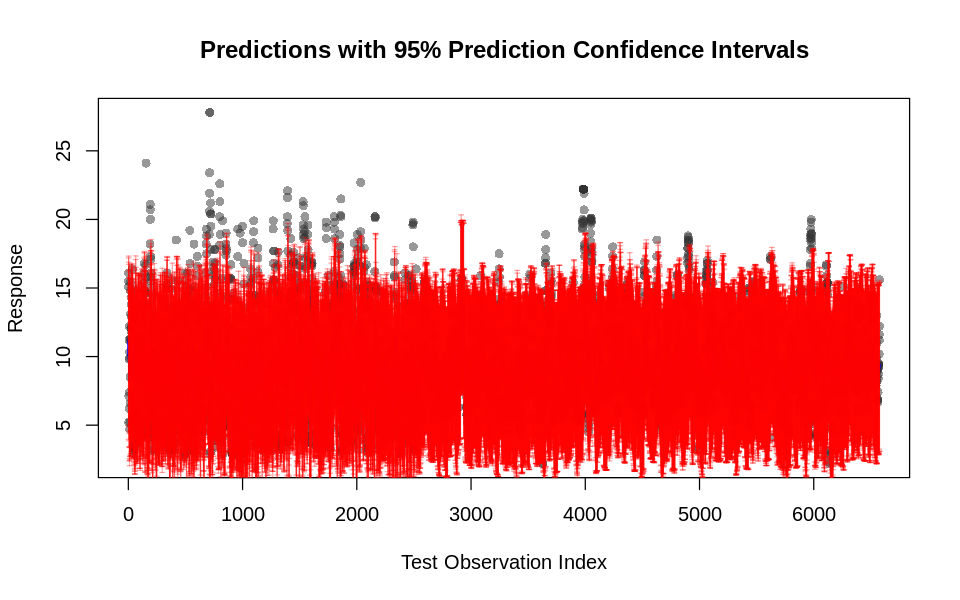

In [56]:
# Plot actual test data (dark gray)
plot(
  y_test,
  pch = 16,
  col = rgb(0.2, 0.2, 0.2, 0.5),
  ylab = "Response",
  xlab = "Test Observation Index",
  main = "Predictions with 95% Prediction Confidence Intervals"
)

# Add predictions (blue)
lines(
  y_pred_test,
  col = "blue",
  lwd = 2
)

# Add confidence intervals as error bars (light red)
arrows(
  x0 = 1:length(y_test),
  y0 = CI_lower,
  x1 = 1:length(y_test),
  y1 = CI_upper,
  angle = 90,
  code = 3,
  length = 0.02,
  col = rgb(1, 0, 0, 0.35)
)


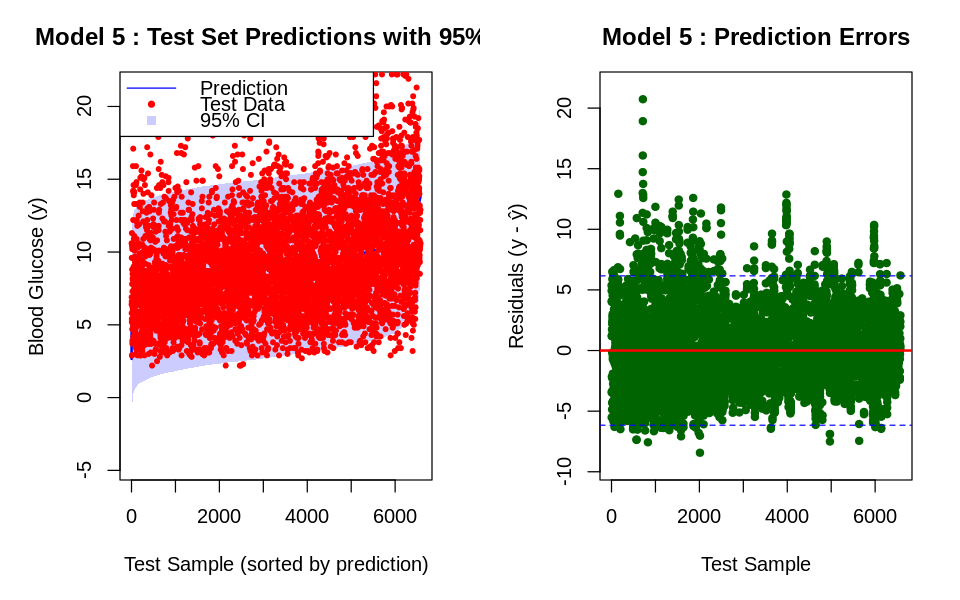

In [58]:
par(mfrow=c(1, 2), mar=c(5, 5, 3, 2))

sort_idx <- order(y_pred_test)
y_pred_sorted <- y_pred_test[sort_idx]
y_test_sorted <- y_test[sort_idx]
CI_lower_sorted <- CI_lower[sort_idx]
CI_upper_sorted <- CI_upper[sort_idx]

plot(1:length(y_pred_sorted), y_pred_sorted,
     type='l', col='blue', lwd=2,
     main=paste('Model', recommended_model, ': Test Set Predictions with 95% CI'),
     xlab='Test Sample (sorted by prediction)',
     ylab='Blood Glucose (y)',
     ylim=c(min(CI_lower_sorted)-1, max(CI_upper_sorted)+1))

polygon(c(1:length(y_pred_sorted), length(y_pred_sorted):1),
        c(CI_lower_sorted, rev(CI_upper_sorted)),
        col=rgb(0, 0, 1, 0.2), border=NA)

points(1:length(y_test_sorted), y_test_sorted, col='red', pch=20, cex=0.8)

legend('topleft', c('Prediction', 'Test Data', '95% CI'),
       col=c('blue', 'red', rgb(0, 0, 1, 0.2)),
       lty=c(1, NA, NA), pch=c(NA, 20, 15))

grid(TRUE, col='gray')

plot(1:length(residuals_test), residuals_test,
     col='darkgreen', pch=19, cex=0.8,
     main=paste('Model', recommended_model, ': Prediction Errors'),
     xlab='Test Sample', ylab='Residuals (y - ŷ)',
     ylim=c(min(residuals_test)-1, max(residuals_test)+1))

abline(h=0, col='red', lwd=2)
abline(h=z_critical*mean(se_pred), col='blue', lwd=1, lty=2)
abline(h=-z_critical*mean(se_pred), col='blue', lwd=1, lty=2)

grid(TRUE, col='gray')


# Task 3

In [60]:
# 3.1
cat( "\n")
cat("TASK 3: APPROXIMATE BAYESIAN COMPUTATION (ABC)\n")
cat("Rejection ABC for Parameter Posterior Distributions\n")
cat("\n\n")

# ===== 3.1: Identify 2 parameters with largest absolute values =====
cat("3.1: IDENTIFYING 2 PARAMETERS WITH LARGEST ABSOLUTE VALUES\n")
cat("\n\n")

abs_params <- abs(theta_hat_train[-length(theta_hat_train)])

if (recommended_model == 1) {
  param_names <- c('β₁', 'β₂', 'β₃', 'β₄', 'β₅', 'β₆')
} else if (recommended_model == 2) {
  param_names <- c('β₁', 'β₂', 'β₃', 'β₄', 'β₅', 'β₆')
} else if (recommended_model == 3) {
  param_names <- c('β₁', 'β₂', 'β₃', 'β₄', 'β₅', 'β₆')
} else if (recommended_model == 4) {
  param_names <- c('β₁', 'β₂', 'β₃', 'β₄', 'β₅', 'β₆')
} else {
  param_names <- c('β₁', 'β₂', 'β₃', 'β₄', 'β₅', 'β₆', 'β₇', 'β₈', 'β₉')
}

top_2_idx <- order(abs_params, decreasing=TRUE)[1:2]
top_2_params <- theta_hat_train[top_2_idx]
top_2_names <- param_names[top_2_idx]

cat("Estimated parameters (training):\n")
for (i in 1:(length(theta_hat_train)-1)) {
  cat(sprintf("  %s = %.6f\n", param_names[i], theta_hat_train[i]))
}
cat(sprintf("  β₀ (Intercept) = %.6f\n", theta_hat_train[length(theta_hat_train)]))
cat("\n")

cat("Top 2 parameters by absolute value:\n")
cat(sprintf("  %s = %.6f (position %d)\n", top_2_names[1], top_2_params[1], top_2_idx[1]))
cat(sprintf("  %s = %.6f (position %d)\n", top_2_names[2], top_2_params[2], top_2_idx[2]))
cat("\n")


TASK 3: APPROXIMATE BAYESIAN COMPUTATION (ABC)
Rejection ABC for Parameter Posterior Distributions


3.1: IDENTIFYING 2 PARAMETERS WITH LARGEST ABSOLUTE VALUES


Estimated parameters (training):
  β₁ = 4.197504
  β₂ = 0.421153
  β₃ = 0.152342
  β₄ = -0.023551
  β₅ = 0.000399
  β₆ = -0.000081
  β₇ = 0.004352
  β₈ = -0.006746
  β₉ = 0.000331
  β₀ (Intercept) = -0.000379

Top 2 parameters by absolute value:
  β₁ = 4.197504 (position 1)
  β₂ = 0.421153 (position 2)



In [61]:
#3.2 Setting up uniform prior distributions

prior_range <- 0.5
prior_lower_1 <- top_2_params[1] * (1 - prior_range)
prior_upper_1 <- top_2_params[1] * (1 + prior_range)
prior_lower_2 <- top_2_params[2] * (1 - prior_range)
prior_upper_2 <- top_2_params[2] * (1 + prior_range)

cat(sprintf("Prior for %s: Uniform[%.6f, %.6f]\n", top_2_names[1], prior_lower_1, prior_upper_1))
cat(sprintf("Prior for %s: Uniform[%.6f, %.6f]\n", top_2_names[2], prior_lower_2, prior_upper_2))
cat("  (Prior range = LS estimate ± 50%)\n\n")


Prior for β₁: Uniform[2.098752, 6.296256]
Prior for β₂: Uniform[0.210577, 0.631730]
  (Prior range = LS estimate ± 50%)



In [62]:
N_samples <- 50000
tolerance <- 0.10

cat(sprintf("ABC Setup:\n"))
cat(sprintf("  Samples from prior: %d\n", N_samples))
cat(sprintf("  Tolerance (quantile): %.2f\n", tolerance))
cat(sprintf("  Expected accepted samples: %d\n", round(N_samples * tolerance)))
cat("\n")

cat("Drawing samples from prior and computing summary statistics...\n")

theta1_samples <- runif(N_samples, prior_lower_1, prior_upper_1)
theta2_samples <- runif(N_samples, prior_lower_2, prior_upper_2)

pb <- txtProgressBar(min=0, max=N_samples, style=3)

all_RSS <- c()
all_theta1 <- c()
all_theta2 <- c()

for (i in 1:N_samples) {
  theta_candidate <- theta_hat_train
  theta_candidate[top_2_idx] <- c(theta1_samples[i], theta2_samples[i])

  y_pred_candidate <- X_train %*% theta_candidate
  residuals_candidate <- y_train - y_pred_candidate
  RSS_candidate <- sum(residuals_candidate^2)

  all_RSS <- c(all_RSS, RSS_candidate)
  all_theta1 <- c(all_theta1, theta1_samples[i])
  all_theta2 <- c(all_theta2, theta2_samples[i])

  setTxtProgressBar(pb, i)
}

close(pb)

cat("\n✓ Summary statistics computed\n\n")

ABC Setup:
  Samples from prior: 50000
  Tolerance (quantile): 0.10
  Expected accepted samples: 5000

Drawing samples from prior and computing summary statistics...
  |======================================================================| 100%

✓ Summary statistics computed



In [63]:
# 3.5
threshold_RSS <- quantile(all_RSS, tolerance)

acceptance_idx <- which(all_RSS <= threshold_RSS)
n_accepted <- length(acceptance_idx)

cat(sprintf("RSS threshold (%.0f%% quantile): %.4f\n", tolerance*100, threshold_RSS))
cat(sprintf("Number of accepted samples: %d / %d (%.2f%%)\n",
           n_accepted, N_samples, 100*n_accepted/N_samples))
cat("\n")

posterior_theta1 <- all_theta1[acceptance_idx]
posterior_theta2 <- all_theta2[acceptance_idx]
posterior_RSS <- all_RSS[acceptance_idx]

# ===== 3.5: Posterior summary statistics =====
cat("3.5: POSTERIOR SUMMARY STATISTICS\n")
cat("\n\n")

mean_theta1 <- mean(posterior_theta1)
sd_theta1 <- sd(posterior_theta1)
ci_theta1_lower <- quantile(posterior_theta1, 0.025)
ci_theta1_upper <- quantile(posterior_theta1, 0.975)

mean_theta2 <- mean(posterior_theta2)
sd_theta2 <- sd(posterior_theta2)
ci_theta2_lower <- quantile(posterior_theta2, 0.025)
ci_theta2_upper <- quantile(posterior_theta2, 0.975)

cat(sprintf("Posterior for %s:\n", top_2_names[1]))
cat(sprintf("  LS estimate: %.6f\n", top_2_params[1]))
cat(sprintf("  Posterior mean: %.6f\n", mean_theta1))
cat(sprintf("  Posterior SD: %.6f\n", sd_theta1))
cat(sprintf("  95%% Credible interval: [%.6f, %.6f]\n", ci_theta1_lower, ci_theta1_upper))
cat("\n")

cat(sprintf("Posterior for %s:\n", top_2_names[2]))
cat(sprintf("  LS estimate: %.6f\n", top_2_params[2]))
cat(sprintf("  Posterior mean: %.6f\n", mean_theta2))
cat(sprintf("  Posterior SD: %.6f\n", sd_theta2))
cat(sprintf("  95%% Credible interval: [%.6f, %.6f]\n", ci_theta2_lower, ci_theta2_upper))
cat("\n")

posterior_corr <- cor(posterior_theta1, posterior_theta2)
cat(sprintf("Posterior correlation: %.4f\n\n", posterior_corr))


RSS threshold (10% quantile): 153517.6101
Number of accepted samples: 5000 / 50000 (10.00%)

3.5: POSTERIOR SUMMARY STATISTICS


Posterior for β₁:
  LS estimate: 4.197504
  Posterior mean: 4.184087
  Posterior SD: 0.720968
  95% Credible interval: [2.935551, 5.460476]

Posterior for β₂:
  LS estimate: 0.421153
  Posterior mean: 0.422259
  Posterior SD: 0.076441
  95% Credible interval: [0.286990, 0.555567]

Posterior correlation: -0.9672



3.6: PLOTTING POSTERIOR DISTRIBUTIONS




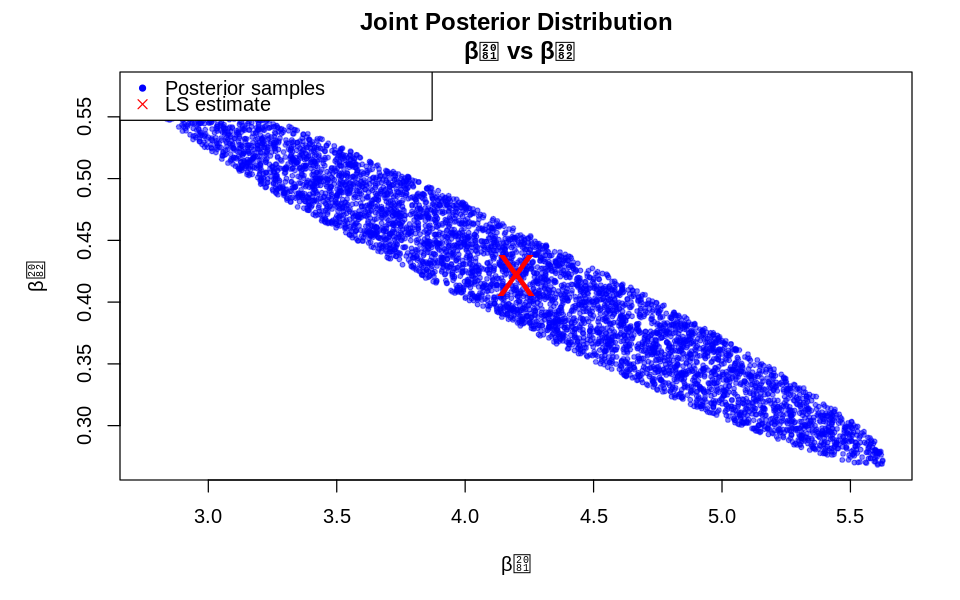

In [64]:
#4 plot posterior distribution
cat("3.6: PLOTTING POSTERIOR DISTRIBUTIONS\n")
cat( "\n\n")

par(mfrow=c(1, 1), mar=c(5, 5, 3, 2))

# Plot 1: Joint posterior
plot(posterior_theta1, posterior_theta2,
     main=paste('Joint Posterior Distribution\n', top_2_names[1], 'vs', top_2_names[2]),
     xlab=top_2_names[1], ylab=top_2_names[2],
     col=rgb(0, 0, 1, 0.5), pch=20, cex=0.8)
points(top_2_params[1], top_2_params[2], col='red', pch='X', cex=3, lwd=3)
grid(TRUE, col='gray')
legend('topleft', c('Posterior samples', 'LS estimate'),
       col=c('blue', 'red'), pch=c(20, 4))

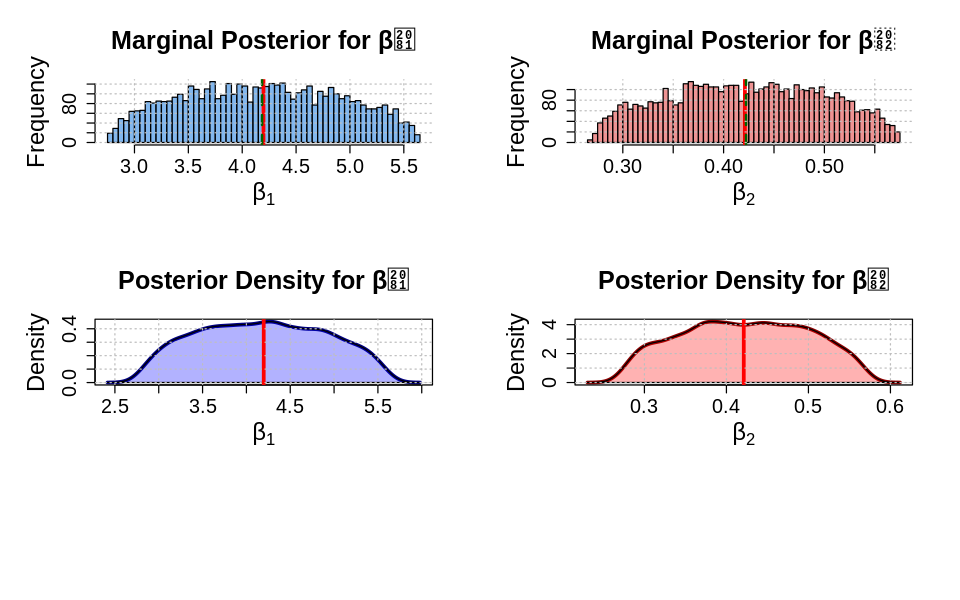

In [72]:

# png(width = 2400, height = 2000, res = 150)
#MArginal and density plot
# -------- Layout (marginal & density 2× bigger) --------
layout(
  matrix(c(1, 2,
           3, 4,
           5, 5), nrow = 3, byrow = TRUE),
  heights = c(2, 2, 1)
)

par(
  mar = c(6, 6, 5, 3),
  cex.lab = 1.8,
  cex.axis = 1.5,
  cex.main = 1.9
)

beta1_lab <- expression(beta[1])
beta2_lab <- expression(beta[2])

# ---- Marginal β1 ----
hist(posterior_theta1, breaks = 50,
     col = rgb(0.3, 0.6, 0.9, 0.7),
     border = "black",
     main = "Marginal Posterior for β₁",
     xlab = beta1_lab, ylab = "Frequency")
abline(v = top_2_params[1], col = "red", lwd = 3)
abline(v = mean_theta1, col = "darkgreen", lwd = 2, lty = 2)
grid(col = "gray")

# ---- Marginal β2 ----
hist(posterior_theta2, breaks = 50,
     col = rgb(0.9, 0.4, 0.4, 0.7),
     border = "black",
     main = "Marginal Posterior for β₂",
     xlab = beta2_lab, ylab = "Frequency")
abline(v = top_2_params[2], col = "red", lwd = 3)
abline(v = mean_theta2, col = "darkgreen", lwd = 2, lty = 2)
grid(col = "gray")

# ---- Density β1 ----
d1 <- density(posterior_theta1)
plot(d1, col = "navy", lwd = 3,
     main = "Posterior Density for β₁",
     xlab = beta1_lab, ylab = "Density")
polygon(d1, col = rgb(0, 0, 1, 0.3))
abline(v = top_2_params[1], col = "red", lwd = 3)
grid(col = "gray")

# ---- Density β2 ----
d2 <- density(posterior_theta2)
plot(d2, col = "darkred", lwd = 3,
     main = "Posterior Density for β₂",
     xlab = beta2_lab, ylab = "Density")
polygon(d2, col = rgb(1, 0, 0, 0.3))
abline(v = top_2_params[2], col = "red", lwd = 3)
grid(col = "gray")


